## Análisis de Pulsos MPPC y PMT

Este análisis involucra una serie de pasos diseñados para explorar, filtrar, y comparar las señales obtenidas de los detectores MPPC (Multi-Pixel Photon Counter) y PMT (Photomultiplier Tube). A través de una combinación de técnicas de procesamiento de señales y estadísticas, se busca identificar patrones, calcular propiedades fundamentales de los pulsos, y evaluar la relación entre las señales de ambos tipos de detectores. La secuencia de pasos incluye:

1. **Visualización de Pulsos en Ventanas Temporales**: Se filtran y grafican los pulsos dentro de rangos de tiempo específicos para ambos tipos de detectores, permitiendo una inspección inicial de las características de los pulsos.

2. **Filtrado Basado en Umbrales**: Se aplican criterios de umbral para excluir señales potencialmente no relevantes o ruido, concentrándose en los pulsos de interés.

3. **Cálculo y Comparación de Integrales**: Se calculan las integrales de los pulsos filtrados para cuantificar la energía de cada pulso, seguido de un análisis estadístico para distinguir las diferencias entre los pulsos dentro y fuera de rangos de interés predefinidos.

4. **Ajuste Gaussiano y Sustracción de Fondo**: Para los pulsos seleccionados, se realiza un ajuste gaussiano para modelar el fondo, permitiendo una mejor identificación de la señal sobre el ruido de fondo.

5. **Estimación del Número de Pulsos**: A partir de la señal ajustada, se estima el número total de pulsos, proporcionando una medida cuantitativa del contenido de la señal.

6. **Discriminación por Rango de Energía**: Se discriminan los pulsos basándose en rangos específicos de energía, analizando su distribución y realizando comparaciones directas entre las señales MPPC y PMT.

7. **Visualización de Correlaciones**: Finalmente, se exploran las correlaciones entre las integrales de pulsos MPPC y PMT a través de histogramas bidimensionales y marginales, revelando posibles relaciones entre las características de los pulsos de ambos detectores.

Este flujo de trabajo detallado proporciona una comprensión profunda de las propiedades y relaciones entre las señales detectadas por MPPC y PMT, fundamentales para la interpretación de experimentos en física de partículas y otras aplicaciones científicas donde estas tecnologías de detección juegan un papel crucial.


## CODE FOR 2 CHANNELS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import uproot

## Read and Plot


## Guía Rápida: Visualización de Pulsos en Ventana Temporal

La función `plot_pulses_in_time_window` está diseñada para leer y graficar pulsos eléctricos de datos almacenados en un archivo CSV. Se enfoca en visualizar los pulsos dentro de una ventana temporal específica y para un número determinado de pulsos. A continuación, se describen los parámetros y su propósito general:

- **`file_path`**: La ruta del archivo CSV que contiene los datos de los pulsos. Es importante asegurarse de que la ruta sea correcta y accesible.

- **`tiempo_inicio`**: El inicio de la ventana temporal de interés, expresado en segundos. Este valor determina desde qué punto en el tiempo se comenzarán a visualizar los pulsos.

- **`tiempo_fin`**: El fin de la ventana temporal de interés, expresado en segundos. Este valor establece hasta qué punto en el tiempo se visualizarán los pulsos.

- **`num_pulsos`**: El número total de pulsos a considerar para la visualización. Si el número es muy grande, se puede ajustar para limitar la cantidad de datos procesados y visualizados.

- **`puntos_por_pulso`**: La cantidad de puntos de datos que representa cada pulso individual. Este parámetro ayuda a dividir el conjunto de datos total en pulsos individuales para su análisis y visualización.

### Funcionamiento General:

1. **Lectura de Datos:** La función comienza leyendo el archivo CSV, ignorando las primeras 12 filas (generalmente reservadas para metadatos o cabeceras) y asumiendo que no hay una fila de cabecera con nombres de columnas.

2. **Preparación de Datos:** Se ajustan las unidades de tiempo a nanosegundos y se aplica un filtro para seleccionar los datos que caen dentro de la ventana temporal especificada.

3. **Visualización:** Para cada pulso dentro del número limitado de pulsos a graficar, se genera una gráfica para dos tipos de señales (MPPC y PMT), mostrando cómo varían en el tiempo dentro de la ventana temporal definida.

4. **Ajustes Finales:** Se realizan ajustes estéticos en las gráficas, como añadir una cuadrícula y leyendas para mejorar la interpretación de los datos.

Este enfoque permite analizar cómo varían los pulsos de interés en un rango de tiempo específico, facilitando la identificación de patrones o anomalías en las señales MPPC y PMT.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


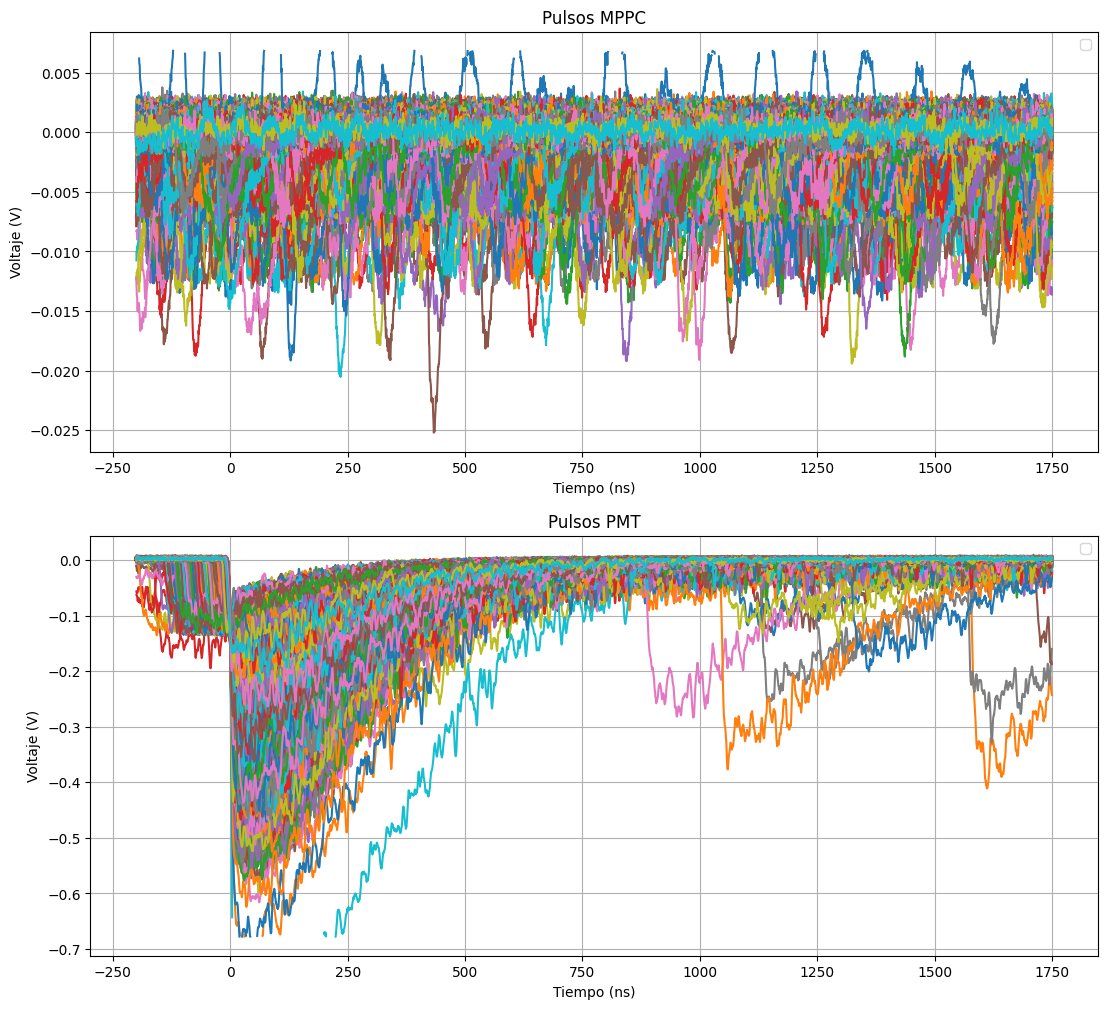

In [2]:


def plot_pulses_in_time_window(file_path, tiempo_inicio, tiempo_fin, num_pulsos, puntos_por_pulso):
    data = pd.read_csv(file_path, skiprows=12, header=None)
    data.columns = ['Time', 'MPPC', 'PMT']

    

    # Escalar el tiempo a nanosegundos y ajustar el rango de tiempo
    data['Time'] = data['Time'] * 1e9
    tiempo_inicio *= 1e9
    tiempo_fin *= 1e9
    
    # Limitar el número de pulsos a graficar
    num_pulsos_a_graficar = min(num_pulsos, 10000)  # Ajustar este número según sea necesario

    # Ajustar el tamaño de la figura
    plt.figure(figsize=(13, 12))

    for i in range(num_pulsos_a_graficar):
        inicio_pulso = i * puntos_por_pulso
        fin_pulso = inicio_pulso + puntos_por_pulso
        pulse_data = data.iloc[inicio_pulso:fin_pulso]
        pulse_data_in_window = pulse_data[(pulse_data['Time'] >= tiempo_inicio) & (pulse_data['Time'] <= tiempo_fin)]

        if not pulse_data_in_window.empty:
            plt.subplot(2, 1, 1)
            plt.plot(pulse_data_in_window['Time'], pulse_data_in_window['MPPC'])
            plt.title('Pulsos MPPC')
            plt.xlabel('Tiempo (ns)')
            plt.ylabel('Voltaje (V)')

            plt.subplot(2, 1, 2)
            plt.plot(pulse_data_in_window['Time'], pulse_data_in_window['PMT'])
            plt.title('Pulsos PMT')
            plt.xlabel('Tiempo (ns)')
            plt.ylabel('Voltaje (V)')

    plt.subplot(2, 1, 1)
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(2, 1, 2)
    plt.grid(True)
    plt.legend(loc='upper right')

    # Opcional: Ajustar el layout si es necesario
    # plt.subplots_adjust(bottom=0.1, top=0.9)

    plt.show()

    return data

# Parámetros
file_path = "tgrpmt-140-980-2overvolt-front_ALL.csv"  # Asegúrate de que la ruta del archivo sea correcta
tiempo_inicio = -0.25e-6
tiempo_fin = 1.75e-6
num_pulsos = 10000
puntos_por_pulso = 3125

data = plot_pulses_in_time_window(file_path, tiempo_inicio, tiempo_fin, num_pulsos, puntos_por_pulso)


## Cuting positives signals in Y axe

## Filtrado de Pulsos por Umbrales

Este segmento de código se centra en el filtrado de pulsos eléctricos basado en umbrales predefinidos para dos tipos de señales: MPPC y PMT. A continuación, se describen los componentes clave del proceso:

- **Definición de Umbrales**: 
  - `umbral_mppc_superior`: Especifica el umbral superior para la señal MPPC. Los pulsos con valores máximos por encima de este umbral serán excluidos del análisis.
  - `umbral_pmt_superior`: Define el umbral superior para la señal PMT. Similar al umbral MPPC, se excluyen los pulsos que exceden este valor.

- **Filtrado de Pulsos**:
  - Se itera sobre el conjunto de pulsos, utilizando los índices `inicio_pulso` y `fin_pulso` para segmentar los datos correspondientes a cada pulso.
  - Cada pulso es evaluado contra los umbrales definidos. Solo los pulsos que no superan los umbrales de MPPC y PMT son considerados válidos y agregados a las listas `pulsos_mppc_validos` y `pulsos_pmt_validos`, respectivamente.

- **Visualización de Pulsos Filtrados**:
  - Se configura un lienzo para la visualización de los pulsos válidos, creando dos subplots: uno para MPPC y otro para PMT.
  - Se trazan los pulsos que pasaron el filtro, visualizando cómo varían en el tiempo y en voltaje, lo que permite una comparación directa de los efectos del filtrado.

### Componentes Clave del Código:

- **Listas de Almacenamiento**: `pulsos_mppc_validos` y `pulsos_pmt_validos` son listas utilizadas para almacenar los datos de los pulsos que cumplen con los criterios de filtrado.

- **Bucles de Filtrado**: Un bucle itera a través de cada pulso, aplicando el criterio de filtrado basado en los umbrales establecidos. Esta operación es fundamental para separar los pulsos que se consideran de interés de aquellos que son potencialmente ruido o no deseados.

- **Configuración de la Visualización**: Se emplean comandos de matplotlib para configurar y mostrar gráficos que representan los pulsos filtrados, ofreciendo una comparación visual antes y después del filtrado.

### Objetivo del Filtrado:

El proceso de filtrado tiene como objetivo identificar y visualizar solo aquellos pulsos que están dentro de los rangos de interés definidos por los umbrales. Esta selección ayuda en el análisis detallado de las características de los pulsos, permitiendo enfocarse en señales que potencialmente contienen información valiosa, excluyendo aquellas con amplitudes que sugieren distorsión o ruido excesivo.


In [3]:
# Definir umbrales
umbral_mppc_superior = 0.004  # Umbral para MPPC
umbral_pmt_superior = 0.01 # Umbral para PMT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


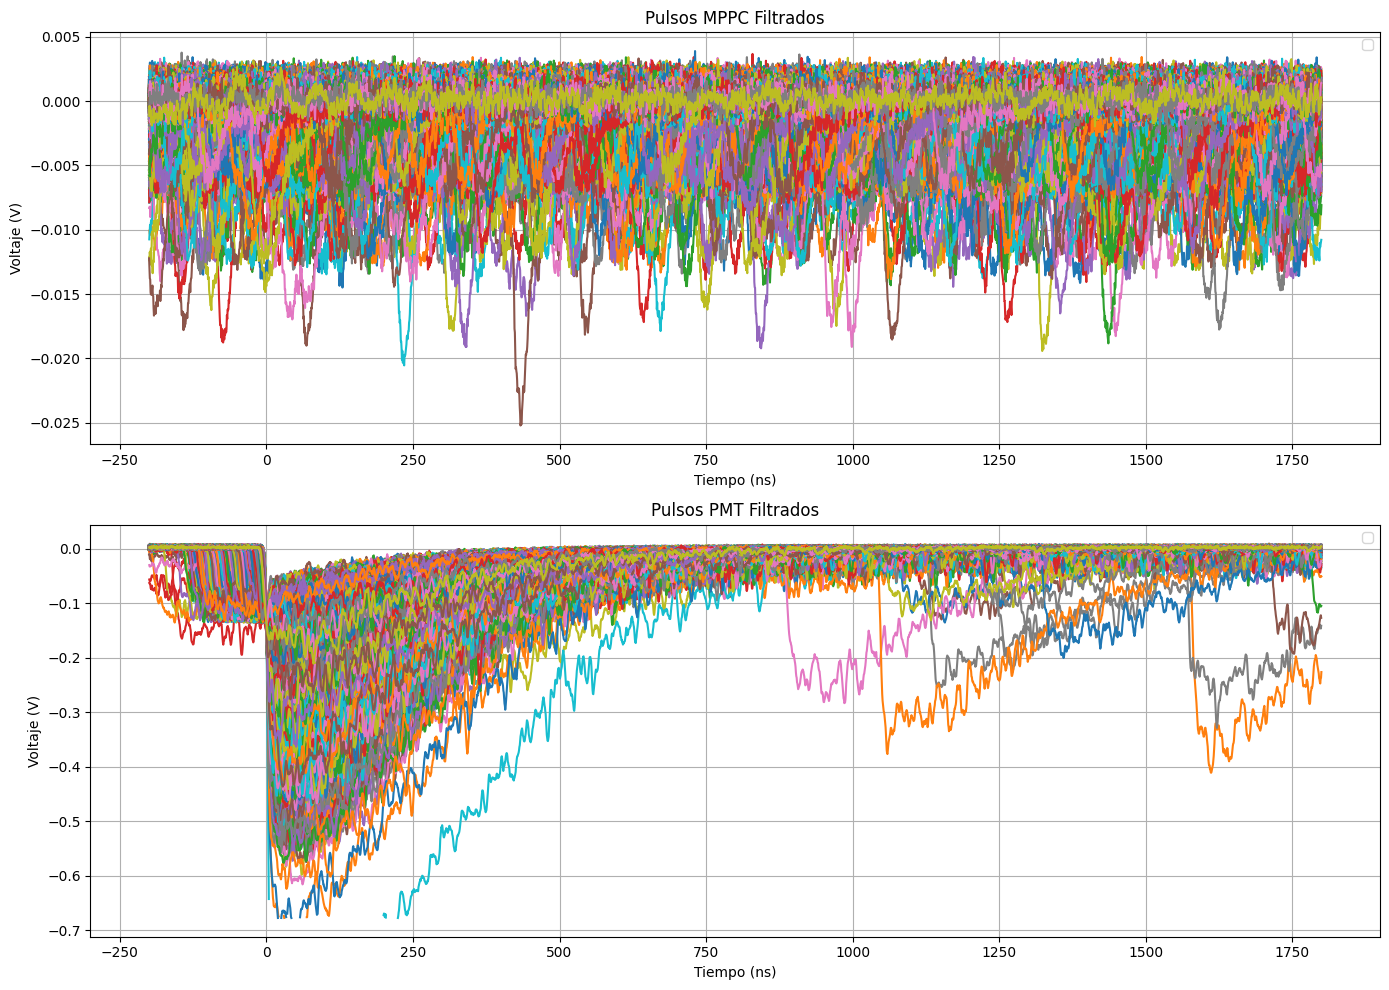

In [4]:


# Listas para almacenar los datos de los pulsos que no superan el umbral
pulsos_mppc_validos = []
pulsos_pmt_validos = []

# Filtrar los pulsos por el umbral
for i in range(num_pulsos):
    inicio_pulso = i * puntos_por_pulso
    fin_pulso = inicio_pulso + puntos_por_pulso
    pulso_mppc = data.iloc[inicio_pulso:fin_pulso]
    pulso_pmt = data.iloc[inicio_pulso:fin_pulso]
    
    # Verificar si algún punto del pulso supera el umbral
    if not (pulso_mppc['MPPC'].max() > umbral_mppc_superior or pulso_pmt['PMT'].max() > umbral_pmt_superior):
        pulsos_mppc_validos.append(pulso_mppc)
        pulsos_pmt_validos.append(pulso_pmt)

#Configurar el lienzo para los plots filtrados
plt.figure(figsize=(14, 10))

for pulso_mppc, pulso_pmt in zip(pulsos_mppc_validos, pulsos_pmt_validos):
    plt.subplot(2, 1, 1)
    plt.plot(pulso_mppc['Time'], pulso_mppc['MPPC'])
    plt.subplot(2, 1, 2)
    plt.plot(pulso_pmt['Time'], pulso_pmt['PMT'])

# Configurar los títulos y etiquetas de los gráficos
plt.subplot(2, 1, 1)
plt.title('Pulsos MPPC Filtrados')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Pulsos PMT Filtrados')
plt.xlabel('Tiempo (ns)')  # Utiliza el modo matemático de LaTeX para el símbolo de micro
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Análisis de Integrales de Pulso y Visualización en Histogramas

Este fragmento de código se dedica al cálculo de las integrales de los pulsos para dos tipos de señales (MPPC y PMT) y su posterior visualización en histogramas. A continuación, se detallan las etapas clave:

### Cálculo de Integrales:

- **Para MPPC**:
  - Se calculan las integrales de cada pulso MPPC válido utilizando la regla trapezoidal (`np.trapz`), que aproxima el área bajo la curva de cada pulso.
  - Se filtran los resultados para excluir valores no finitos (`NaN` e `inf`), asegurando que solo se consideren las integrales con valores numéricos válidos.

- **Para PMT**:
  - De manera similar, se calculan y filtran las integrales de los pulsos PMT válidos, excluyendo nuevamente los valores no finitos para obtener un conjunto limpio de integrales para análisis.

### Visualización en Histogramas:

- Se configura un lienzo dividido en dos secciones (subplots) para visualizar los histogramas correspondientes a las integrales de los pulsos MPPC y PMT.
- **Histograma MPPC**:
  - Se muestra un histograma de las integrales finitas para MPPC, proporcionando una distribución de la 'área bajo la curva' de los pulsos, lo que refleja sus energías.
- **Histograma PMT**:
  - De forma análoga, se visualiza el histograma para las integrales finitas de PMT, permitiendo comparar las distribuciones de energía entre ambos tipos de señales.

### Componentes Clave del Código:

- **`np.trapz`**: Función utilizada para calcular la integral numérica de los pulsos utilizando el método de la regla trapezoidal.
- **Filtrado de Valores Finitos**: Asegura que solo se incluyan en el análisis las integrales con valores finitos, excluyendo aquellas que podrían introducir errores o sesgos debido a valores no definidos o infinitos.
- **Visualización**: Los histogramas proporcionan una representación gráfica de la distribución de las integrales de los pulsos, ofreciendo insights sobre las características generales de las señales analizadas.

### Objetivo del Análisis:

Este análisis busca cuantificar la energía de los pulsos eléctricos mediante el cálculo de sus integrales y visualizar la distribución de estas energías para cada tipo de señal (MPPC y PMT). Esta aproximación permite una comparación entre las señales y puede ayudar en la identificación de patrones, diferencias significativas o anomalías en las distribuciones de energía.


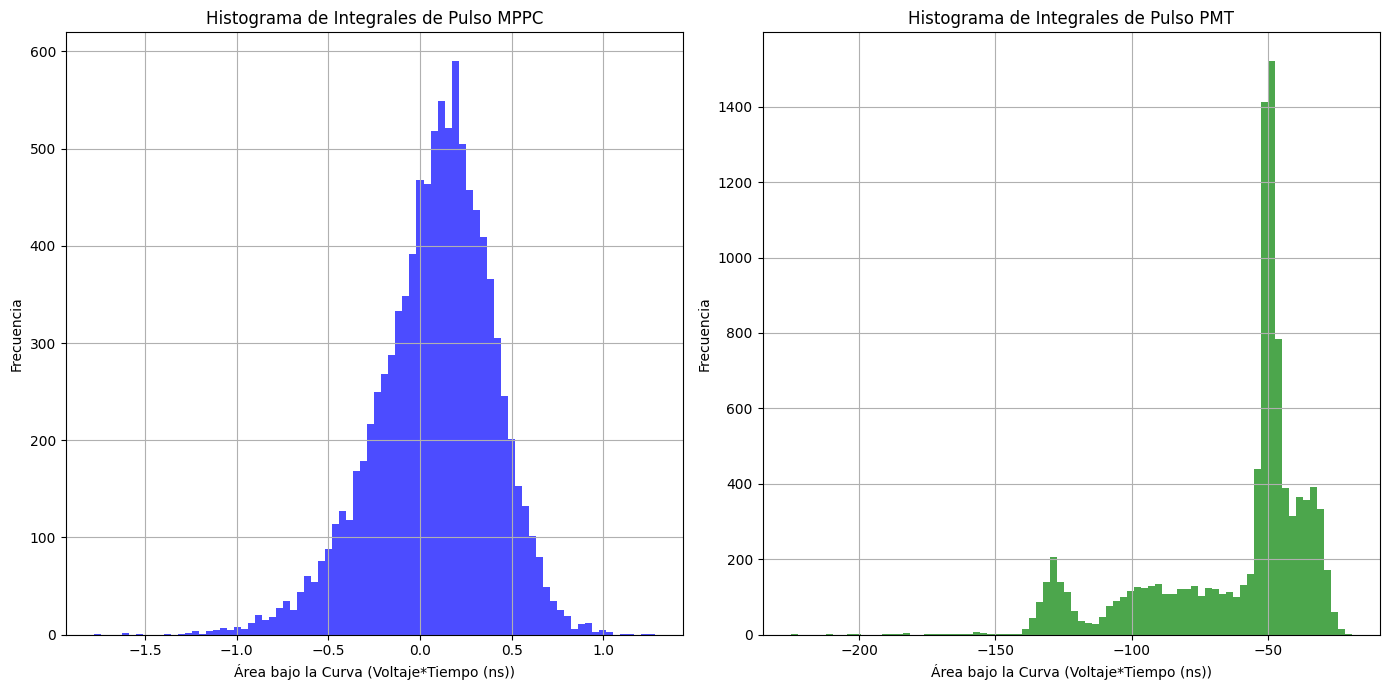

In [5]:
# Calcular las integrales de cada pulso y filtrar los NaN e inf para MPPC
integrales_mppc_completo = [np.trapz(pulso['MPPC'].values, pulso['Time'].values) for pulso in pulsos_mppc_validos]
integrales_mppc_finitas_completo = [integral for integral in integrales_mppc_completo if np.isfinite(integral)]

# Calcular las integrales de cada pulso y filtrar los NaN e inf para PMT
integrales_pmt_completo = [np.trapz(pulso['PMT'].values, pulso['Time'].values) for pulso in pulsos_pmt_validos]
integrales_pmt_finitas_completo = [integral for integral in integrales_pmt_completo if np.isfinite(integral)]

# Configurar el lienzo para los histogramas
plt.figure(figsize=(14, 7))

# Histograma de integrales finitas para MPPC
plt.subplot(1, 2, 1)
plt.hist(integrales_mppc_finitas_completo, bins=80, color='blue', alpha=0.7)
plt.title('Histograma de Integrales de Pulso MPPC')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma de integrales finitas para PMT
plt.subplot(1, 2, 2)
plt.hist(integrales_pmt_finitas_completo, bins=80, color='green', alpha=0.7)
plt.title('Histograma de Integrales de Pulso PMT')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()

## Análisis de Integrales de Pulso y Ajuste Gaussiano

Este fragmento de código realiza dos operaciones principales: el cálculo de las integrales para cada pulso filtrado anteriormente y la aplicación de un ajuste gaussiano sobre los resultados. A continuación, se detallan los pasos y componentes clave:

### Cálculo de Integrales:

- **Para MPPC y PMT**: Se calculan las integrales de los pulsos válidos (aquellos filtrados en pasos anteriores) para MPPC y PMT utilizando la regla trapezoidal (`np.trapz`). Esto proporciona una medida de la "área bajo la curva" para cada pulso, que es una representación cuantitativa de la señal.

- **Filtrado de Valores No Finitos**: Se eliminan los valores `NaN` e infinitos de las integrales calculadas para garantizar la validez de los datos analizados.

### Histogramas de Integrales:

- Se visualizan los histogramas de las integrales finitas para MPPC y PMT, lo cual permite observar la distribución de estas "áreas bajo la curva" y potencialmente identificar características o agrupaciones específicas dentro de los datos.

### Ajuste Gaussiano:

- **Selección de Datos para el Ajuste**: A partir del histograma de PMT, se identifica visualmente un rango específico que se asocia con un pico de interés (por ejemplo, el ruido base). Este rango se utiliza para filtrar los datos y aplicar el ajuste gaussiano.

- **Aplicación del Ajuste**: Se utiliza la función `curve_fit` de SciPy para ajustar una función gaussiana a los datos filtrados, proporcionando una descripción matemática del pico seleccionado.

- **Visualización del Ajuste**: Se traza la curva gaussiana ajustada sobre el histograma de PMT, permitiendo una comparación visual entre los datos observados y el modelo ajustado.

### Parámetros del Ajuste Gaussiano:

- Finalmente, se imprimen los parámetros resultantes del ajuste gaussiano (amplitud, media y desviación estándar), ofreciendo una descripción cuantitativa del pico de interés.

### Objetivo del Análisis:

Este proceso combina técnicas de integración numérica y ajuste de curvas para analizar y caracterizar los pulsos eléctricos en términos de su distribución de energía. El ajuste gaussiano, en particular, permite identificar y describir estadísticamente características específicas de la señal, como picos asociados con ciertos eventos o niveles de ruido.


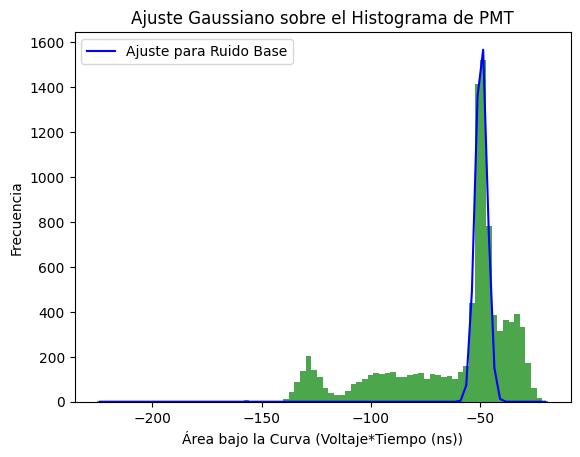

Amplitud: 1648.1339863068627, Media: -49.607886838434226, Desviación estándar: 2.74817670335041


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Función gaussiana para el ajuste
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))


# Histograma de los datos
bin_heights, bin_borders, _ = plt.hist(integrales_pmt_finitas_completo, bins=80, color='green', alpha=0.7)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

# Ajuste gaussiano para el pico de  Ruido keV
# Necesitarás identificar el rango aproximado para el pico de 0 keV en tu histograma.

# Primero, encuentra el rango de los bins que corresponden a este pico
mask_1274 = (bin_centers > -55) & (bin_centers < -45)
bin_centers_1274 = bin_centers[mask_1274]
bin_heights_1274 = bin_heights[mask_1274]

# Valores iniciales para el ajuste gaussiano
p0_1274 = [max(bin_heights_1274), bin_centers_1274[np.argmax(bin_heights_1274)], 10]

# Realiza el ajuste gaussiano
popt_511, _ = curve_fit(gaussian, bin_centers_1274, bin_heights_1274, p0=p0_1274)

# Representación gráfica de los ajustes
plt.plot(bin_centers, gaussian(bin_centers, *popt_511), label='Ajuste para Ruido Base', color='blue')

plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.title('Ajuste Gaussiano sobre el Histograma de PMT')
plt.legend()
plt.show()

# Imprime los parámetros del ajuste para el pico de 1274 keV
print(f"Amplitud: {popt_511[0]}, Media: {popt_511[1]}, Desviación estándar: {popt_511[2]}")

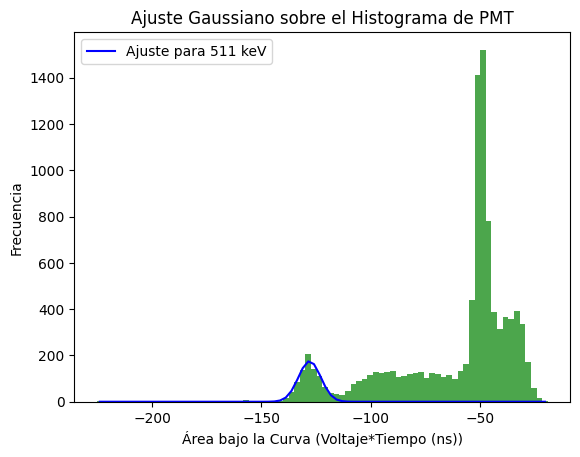

Amplitud: 175.45210101152122, Media: -128.01459918614745, Desviación estándar: 5.095289607655043


In [7]:

from scipy.optimize import curve_fit

# Función gaussiana para el ajuste
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Datos de entrada: reemplaza estos con tus datos reales
# integrales_pmt_finitas_completo = [...]

# Histograma de los datos
bin_heights, bin_borders, _ = plt.hist(integrales_pmt_finitas_completo, bins=80, color='green', alpha=0.7)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

# Primero, encuentra el rango de los bins que corresponden a este pico
mask_1274 = (bin_centers > -150) & (bin_centers < -100)
bin_centers_1274 = bin_centers[mask_1274]
bin_heights_1274 = bin_heights[mask_1274]

# Valores iniciales para el ajuste gaussiano
p0_1274 = [max(bin_heights_1274), bin_centers_1274[np.argmax(bin_heights_1274)], 10]

# Realiza el ajuste gaussiano
popt_1274, _ = curve_fit(gaussian, bin_centers_1274, bin_heights_1274, p0=p0_1274)

# Representación gráfica de los ajustes
plt.plot(bin_centers, gaussian(bin_centers, *popt_1274), label='Ajuste para 511 keV', color='blue')

plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.title('Ajuste Gaussiano sobre el Histograma de PMT')
plt.legend()
plt.show()

# Imprime los parámetros del ajuste para el pico de 1274 keV
print(f"Amplitud: {popt_1274[0]}, Media: {popt_1274[1]}, Desviación estándar: {popt_1274[2]}")


## Calibración de Histogramas a Unidades de Energía

Este fragmento de código ilustra el proceso de calibración de datos de histograma de integrales de pulso para convertir sus unidades originales (por ejemplo, área bajo la curva en unidades de voltaje por tiempo) a unidades de energía (keV). Este paso es esencial en experimentos donde es necesario relacionar las magnitudes medibles directamente con cantidades físicas de interés, como la energía de eventos detectados. Aquí se describe el proceso y su propósito.

### Definición de Parámetros:

- **Media de los Picoss**: Se toman las medias (`media_511` y `media_1274`) de dos picos identificados previamente a través de un ajuste gaussiano. Estos valores representan las posiciones de los picos en unidades del histograma original.

- **Construcción del Sistema de Ecuaciones**: Se utiliza un sistema de ecuaciones lineales para relacionar las medias de los picos con sus correspondientes valores conocidos de energía. Esto se hace para encontrar una transformación lineal (pendiente `a` y ordenada al origen `b`) que calibre los datos del histograma a unidades de energía.

### Proceso de Calibración:

1. **Sistema de Ecuaciones Lineales**: Se establece un sistema basado en las medias de los picos y sus energías conocidas (en este caso, se utiliza `0.001` para el pico de 511 keV como ejemplo, esto es debido a que se esta buscando el ruido y no los 2 picos clasicos del na-22 511 y 1274 kev).

2. **Resolución del Sistema**: Se resuelve el sistema para encontrar los coeficientes de la transformación lineal (`a` y `b`), que permitirán convertir las unidades del histograma a energía.

3. **Función de Conversión**: Se define una función `convertir_a_energia(x)`, que aplica la transformación lineal a cualquier valor `x` en las unidades originales del histograma, convirtiéndolo a energía en keV.

4. **Aplicación de la Calibración**: Finalmente, se utiliza la función de conversión para recalibrar las posiciones de los centros de los bins del histograma original a unidades de energía, y se grafica el histograma recalibrado.

### Visualización del Histograma Calibrado:

- El histograma recalibrado muestra la distribución de frecuencias de eventos en términos de su energía, facilitando la interpretación física de los datos y permitiendo comparaciones directas con otros experimentos o teorías.

Este método de calibración es un paso crucial en la cadena de análisis de datos en experimentos físicos, especialmente en aquellos relacionados con la detección de radiación o partículas, donde la energía de los eventos es de interés primordial.


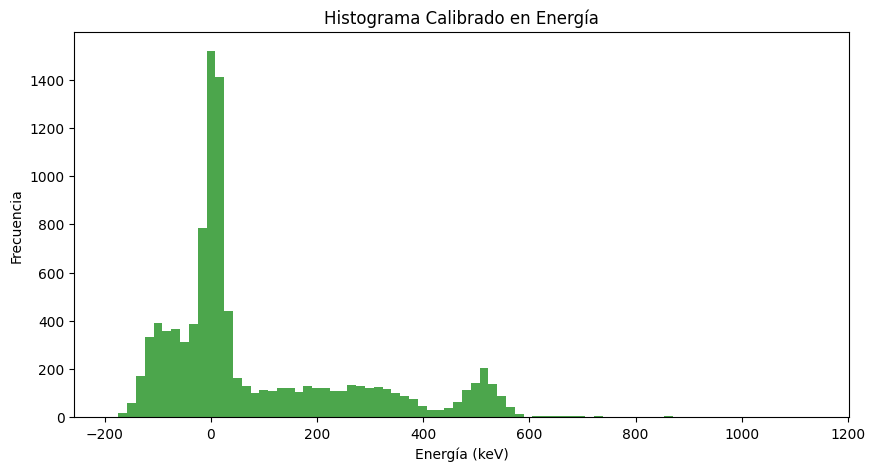

In [8]:
# Parámetros de los picos (reemplaza con tus valores reales)
media_511 = popt_511[1]
media_1274 = popt_1274[1]

# Construir el sistema de ecuaciones lineales
A = np.array([[media_511, 1], [media_1274, 1]])
B = np.array([0.001, 511])

# Resolver para encontrar la pendiente (a) y la intersección (b)
a, b = np.linalg.solve(A, B)

# Función para convertir de unidades de histograma a energía
def convertir_a_energia(x):
    return a * x + b

# Aplicar la calibración al histograma
energias_calibradas = convertir_a_energia(bin_centers)


# Ahora puedes graficar tu histograma en términos de energía
plt.figure(figsize=(10, 5))
plt.hist(energias_calibradas, bins=80, weights=bin_heights, color='green', alpha=0.7)
plt.title('Histograma Calibrado en Energía')
plt.xlabel('Energía (keV)')
plt.ylabel('Frecuencia')
plt.show()


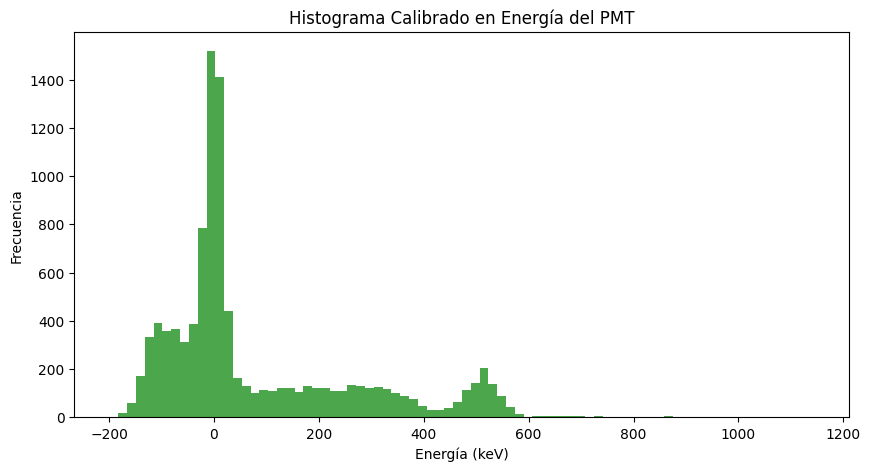

In [10]:

integrales_pmt_finitas_completo_np = np.array(integrales_pmt_finitas_completo)

# Aplicar la calibración al histograma
energias_calibradas = convertir_a_energia(integrales_pmt_finitas_completo_np)

# Crear el histograma calibrado
histograma_calibrado, bins_calibrados = np.histogram(energias_calibradas, bins=80)

# Graficar el histograma calibrado
plt.figure(figsize=(10, 5))
plt.hist(bins_calibrados[:-1], bins=bins_calibrados, weights=histograma_calibrado, color='green', alpha=0.7)
plt.title('Histograma Calibrado en Energía del PMT')
plt.xlabel('Energía (keV)')
plt.ylabel('Frecuencia')
plt.show()


## Guardar Histogramas en Archivo ROOT

**Qué hace**: Este código calcula histogramas de dos conjuntos de datos (MPPC y PMT) y los guarda en un archivo ROOT.

**Pasos**:
1. **Calcular Histogramas**: Se utilizan `np.histogram` para los datos MPPC y PMT con un número definido de `num_bins`.
2. **Crear Archivo ROOT**: Se emplea `uproot.recreate` para generar un archivo ROOT, `HISTOFRONT.root`.
3. **Guardar Histogramas**: Los histogramas calculados se guardan en el archivo bajo las claves "MPPC" y "PMT".


In [15]:
# Definir el número de bins para los histogramas
num_bins = 80  # Este valor se puede ajustar según sea necesario

# Calcular los histogramas con numpy
hist_mppc2, bins_mppc = np.histogram(integrales_mppc_finitas_completo, bins=num_bins)
hist_pmt2, bins_pmt = np.histogram(energias_calibradas, bins=num_bins)



# Crear un nuevo archivo ROOT para guardar los histogramas
with uproot.recreate("HISTOFRONT.root") as f:
    # Guardar el histograma de MPPC
    f["MPPC"] = (hist_mppc2, bins_mppc)
    
    # Guardar el histograma de PMT
    f["PMT"] = (hist_pmt2, bins_pmt)

In [30]:
"""# Definir el número de bins para los histogramas
num_bins = 80  # Este valor se puede ajustar según sea necesario

# Calcular los histogramas con numpy
hist_mppc2, bins_mppc = np.histogram(integrales_mppc_finitas_completo, bins=num_bins)
hist_pmt2, bins_pmt = np.histogram(energias_calibradas, bins=num_bins)



# Crear un nuevo archivo ROOT para guardar los histogramas
with uproot.recreate("HISTOFRONT.root") as f:
    # Guardar el histograma de MPPC
    f["MPPC"] = (hist_mppc2, bins_mppc)
    
    # Guardar el histograma de PMT
    f["PMT"] = (energias_calibradas, bins_pmt)
"""

ValueError: operands could not be broadcast together with shapes (9996,) (80,) 

# LOWER TRIGGER

## Proceso de Filtrado y Graficación de Pulsos

**Qué hace**: Este código filtra y grafica pulsos de dos conjuntos de datos (MPPC y PMT) basados en ventanas de tiempo y umbrales específicos.

**Pasos**:
1. **Definir Ventanas de Tiempo**: Establece ventanas para corrección de offset y para graficar pulsos.
2. **Establecer Umbrales**: Define umbrales para filtrar pulsos.
3. **Filtrar Pulsos**: Selecciona pulsos dentro de las ventanas de tiempo y que superan los umbrales.
4. **Graficar Pulsos**: Muestra los pulsos filtrados para cada conjunto de datos.


In [11]:
# Parámetros de la ventana de tiempo para la corrección del offset
tiempo_inicio_correccion_mppc = -0.2*1e3
tiempo_fin_correccion_mppc = -0.18*1e3

tiempo_inicio_correccion_pmt = -0.2*1e3
tiempo_fin_correccion_pmt = -0.18*1e3



# Parámetros de la nueva ventana de tiempo para graficar
tiempo_inicio_graficar_mppc = -0.2*1e3
tiempofinmppc= 1.5*1e3

tiempo_inicio_graficar_pmt = -0.25*1e3
tiempo_fin_graficar_pmt = 1.75*1e3


# Umbral para filtrar los pulsos PMT
umbral_pmt = -0.00
umbral_mppc = -0.000

In [13]:
"""# Listas para almacenar los DataFrames de los datos corregidos
pulsos_mppc_corregidos = []
pulsos_pmt_corregidos = []

# Procesar los pulsos válidos y corregir el offset
for pulso_mppc, pulso_pmt in zip(pulsos_mppc_validos, pulsos_pmt_validos):
    # Crear una copia de los dataframes para evitar SettingWithCopyWarning
    pulso_mppc_copia = pulso_mppc.copy()
    pulso_pmt_copia = pulso_pmt.copy()

    # Calcular la media en la ventana de tiempo para corrección
    media_mppc = pulso_mppc_copia[(pulso_mppc_copia['Time'] >= tiempo_inicio_correccion_mppc) & (pulso_mppc_copia['Time'] <= tiempo_fin_correccion_mppc)]['MPPC'].mean()
    media_pmt = pulso_pmt_copia[(pulso_pmt_copia['Time'] >= tiempo_inicio_correccion_pmt) & (pulso_pmt_copia['Time'] <= tiempo_fin_correccion_pmt)]['PMT'].mean()
    
    # Restar la media para corregir el offset
    pulso_mppc_copia['MPPC'] -= media_mppc
    pulso_pmt_copia['PMT'] -= media_pmt
    
    # Almacenar los DataFrames corregidos
    pulsos_mppc_corregidos.append(pulso_mppc_copia)
    pulsos_pmt_corregidos.append(pulso_pmt_copia)"""

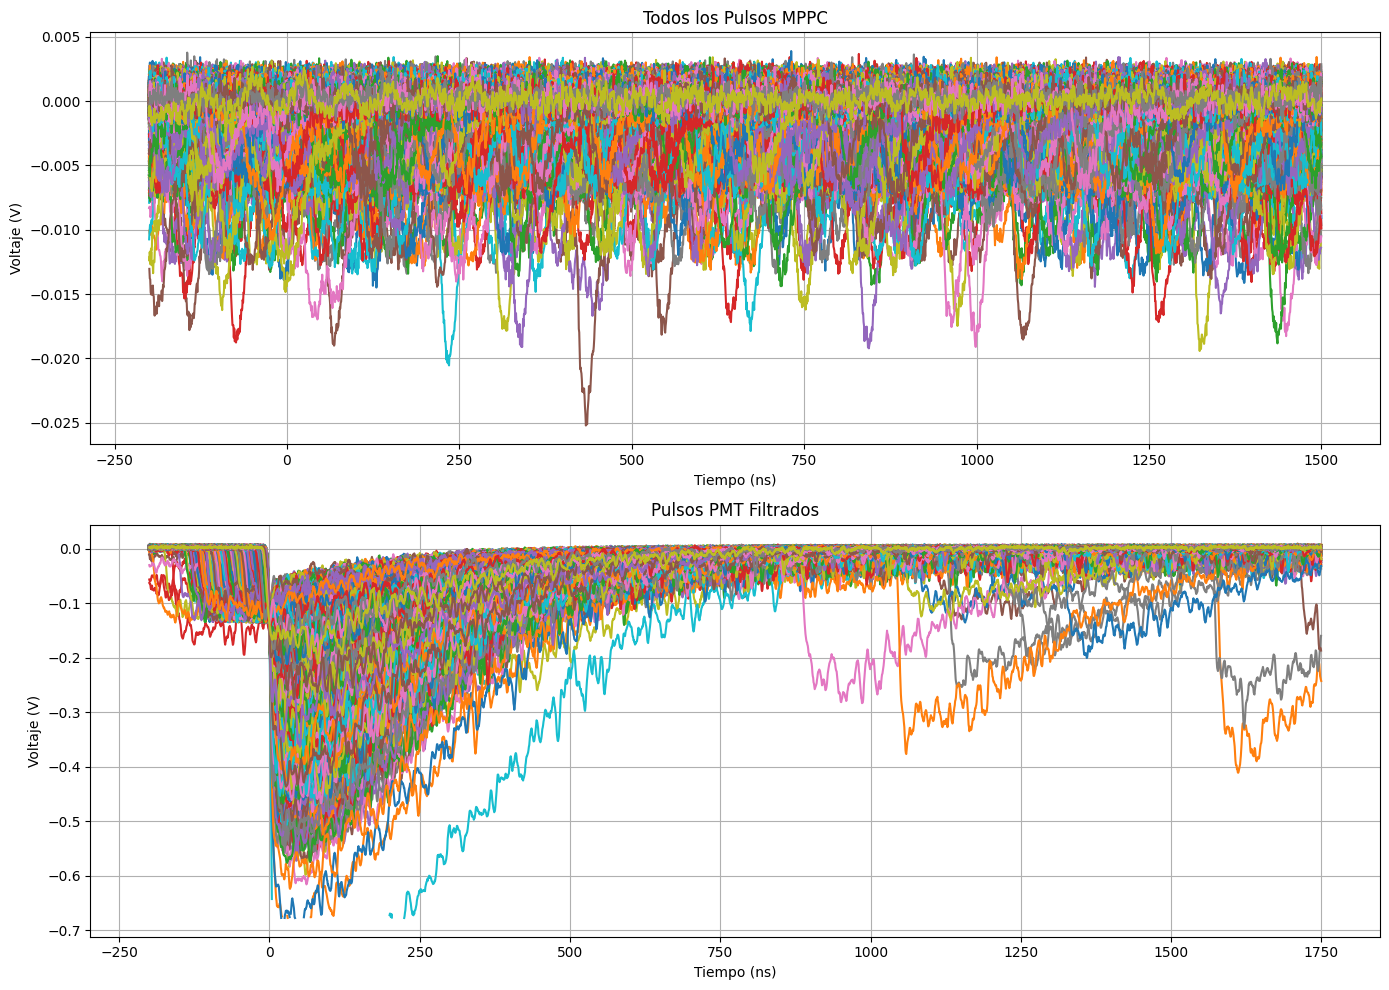

In [12]:
# Listas para almacenar los DataFrames de los pulsos dentro de la ventana de tiempo
pulsos_mppc_en_ventana = []
pulsos_pmt_en_ventana = []


#IMPORTANTE
#En caso de no tener como corregir offset, cambiar pulsos corregidos por pulsos valido


# Graficar y almacenar los pulsos corregidos en la nueva ventana de tiempo
#for pulso_mppc, pulso_pmt in zip(pulsos_mppc_corregidos, pulsos_pmt_corregidos):
for pulso_mppc, pulso_pmt in zip(pulsos_mppc_validos, pulsos_pmt_validos):
    # Filtrar por la nueva ventana de tiempo para graficar
    pulso_mppc_filtrado = pulso_mppc[(pulso_mppc['Time'] >= tiempo_inicio_graficar_mppc) & (pulso_mppc['Time'] <= tiempofinmppc)]
    pulso_pmt_filtrado = pulso_pmt[(pulso_pmt['Time'] >= tiempo_inicio_graficar_pmt) & (pulso_pmt['Time'] <= tiempo_fin_graficar_pmt)]

    # Almacenar los DataFrames filtrados
    pulsos_mppc_en_ventana.append(pulso_mppc_filtrado)
    pulsos_pmt_en_ventana.append(pulso_pmt_filtrado)

    # Graficar
    #plt.subplot(2, 1, 1)
    #plt.plot(pulso_mppc_filtrado['Time'], pulso_mppc_filtrado['MPPC'])
    
    #plt.subplot(2, 1, 2)
    #plt.plot(pulso_pmt_filtrado['Time'], pulso_pmt_filtrado['PMT'])




# Lista para almacenar solo los pulsos PMT filtrados
pulsos_pmt_umbral = []

# Filtrar y almacenar solo los pulsos PMT que superan el umbral
for pulso_pmt in pulsos_pmt_en_ventana:
    # Verificar si el pulso PMT supera el umbral negativamente en algún punto dentro de la ventana de tiempo
    if (pulso_pmt['PMT'] < umbral_pmt).any():
        pulsos_pmt_umbral.append(pulso_pmt)  # Conservar solo los pulsos PMT que cumplen el umbral

# Lista para almacenar solo los pulsos PMT filtrados
pulsos_mppc_umbral = []

# Filtrar y almacenar solo los pulsos PMT que superan el umbral
for pulso_mppc in pulsos_mppc_en_ventana:
    # Verificar si el pulso PMT supera el umbral negativamente en algún punto dentro de la ventana de tiempo
    if (pulso_mppc['MPPC'] < umbral_mppc).any():
        pulsos_mppc_umbral.append(pulso_mppc)  # Conservar solo los pulsos PMT que cumplen el umbral

# Configuración del lienzo para los plots
plt.figure(figsize=(14, 10))

# Graficar todos los pulsos MPPC
plt.subplot(2, 1, 1)
for pulso_mppc in pulsos_mppc_umbral:
    plt.plot(pulso_mppc['Time'], pulso_mppc['MPPC'])
plt.title('Todos los Pulsos MPPC')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Voltaje (V)')
plt.grid(True)

# Graficar solo los pulsos PMT filtrados
plt.subplot(2, 1, 2)
for pulso_pmt in pulsos_pmt_umbral:
    plt.plot(pulso_pmt['Time'], pulso_pmt['PMT'])
plt.title('Pulsos PMT Filtrados')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Voltaje (V)')
plt.grid(True)

plt.tight_layout()
plt.show()



# integral en el intervalo


## Generación de Histogramas de Integrales de Pulso

**Qué hace**: Calcula y grafica histogramas de integrales de pulso para los conjuntos de datos MPPC y PMT, incluyendo un paso de filtrado para excluir valores no finitos.

**Pasos**:
1. **Calcular Integrales**: Usa la regla trapezoidal para calcular las integrales de cada pulso en ambos conjuntos de datos.
2. **Filtrar Valores**: Excluye valores no finitos (NaN e infinitos) de las integrales calculadas.
3. **Graficar Histogramas**: Crea histogramas para las integrales finitas de MPPC y para las energías calibradas de PMT, configurando adecuadamente el lienzo.


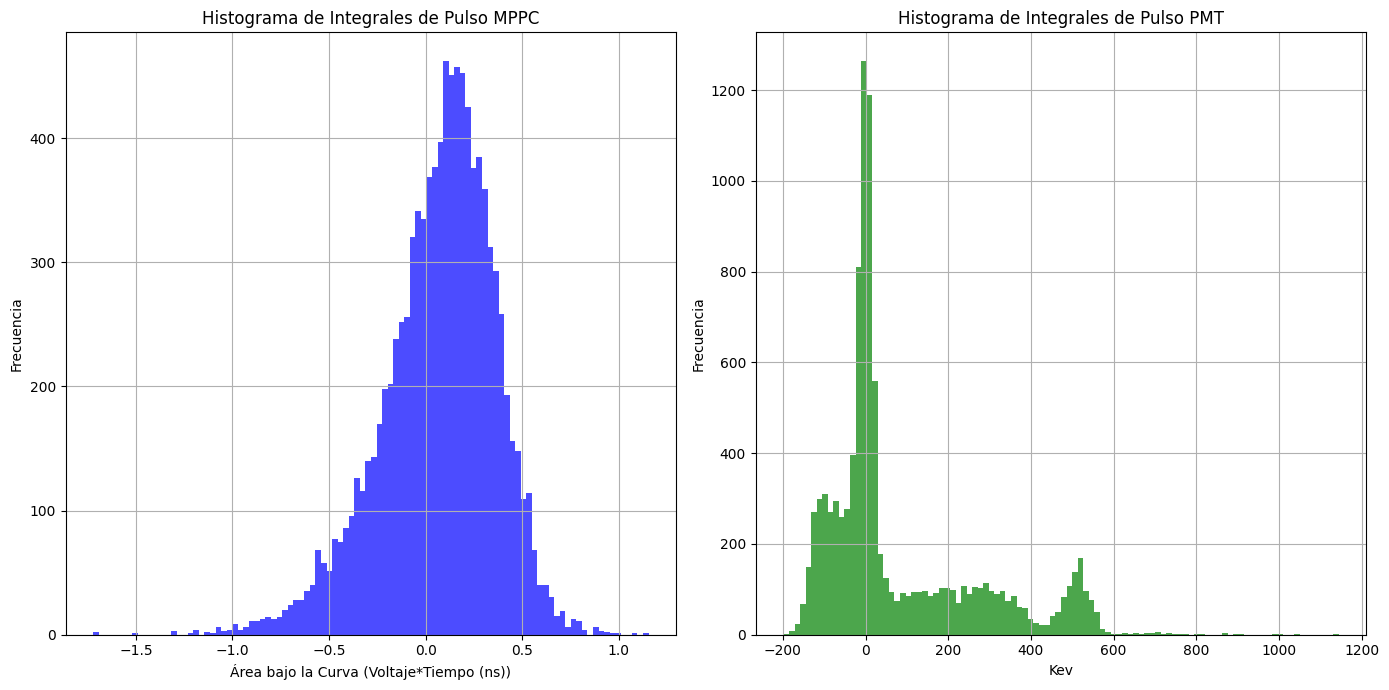

In [13]:
# Calcular las integrales de cada pulso y filtrar los NaN e inf para MPPC



integrales_mppc = [np.trapz(pulso['MPPC'].values, pulso['Time'].values) for pulso in pulsos_mppc_umbral]
integrales_mppc_finitas = [integral for integral in integrales_mppc if np.isfinite(integral)]

# Calcular las integrales de cada pulso y filtrar los NaN e inf para PMT
integrales_pmt = [np.trapz(pulso['PMT'].values, pulso['Time'].values) for pulso in pulsos_pmt_umbral]
integrales_pmt_finitas = [integral for integral in integrales_pmt if np.isfinite(integral)]



integrales_pmt_finitas = energias_calibradas


# Configurar el lienzo para los histogramas
plt.figure(figsize=(14, 7))

# Histograma de integrales finitas para MPPC
plt.subplot(1, 2, 1)
plt.hist(integrales_mppc_finitas, bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Integrales de Pulso MPPC')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma de integrales finitas para PMT
plt.subplot(1, 2, 2)
plt.hist(energias_calibradas, bins=100, color='green', alpha=0.7)
plt.title('Histograma de Integrales de Pulso PMT')
plt.xlabel('Kev')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()

Se guarda en root

In [11]:
# Definir el número de bins para los histogramas
num_bins = 80  # Este valor se puede ajustar según sea necesario

# Calcular los histogramas con numpy
hist_mppc2, bins_mppc = np.histogram(integrales_mppc_finitas, bins=num_bins)
hist_pmt2, bins_pmt = np.histogram(integrales_pmt_finitas, bins=num_bins)



# Crear un nuevo archivo ROOT para guardar los histogramas
with uproot.recreate("HISTOFRONT.root") as f:
    # Guardar el histograma de MPPC
    f["MPPC"] = (hist_mppc2, bins_mppc)
    
    # Guardar el histograma de PMT
    f["PMT"] = (hist_pmt2, bins_pmt)


calculo gausiana de ruido

## Resumen de Cálculo y Visualización de Histogramas

**Acción**: El código realiza cálculos de integrales para pulsos seleccionados y genera histogramas para visualizar la distribución de estas integrales.

**Etapas**:
1. **Cálculo de Integrales**: Obtiene las integrales de pulsos MPPC y PMT usando la regla trapezoidal.
2. **Filtrado**: Elimina valores no finitos de las integrales calculadas.
3. **Histogramas**: Muestra histogramas de integrales finitas para MPPC y PMT, ajustando visualización.


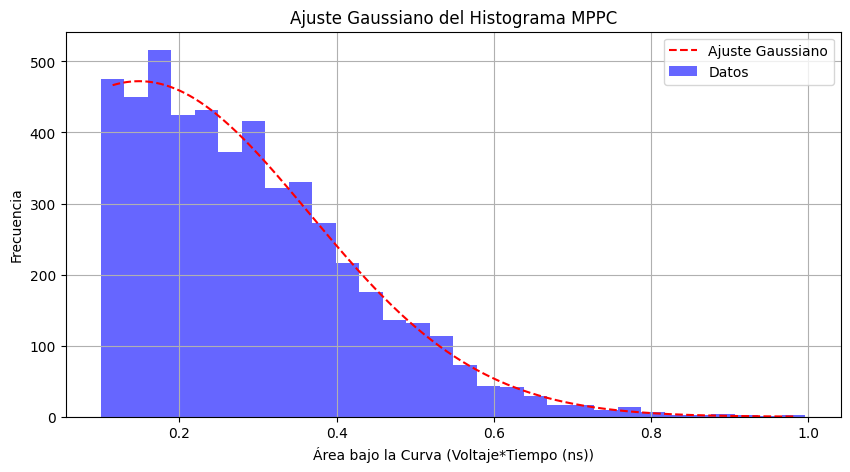

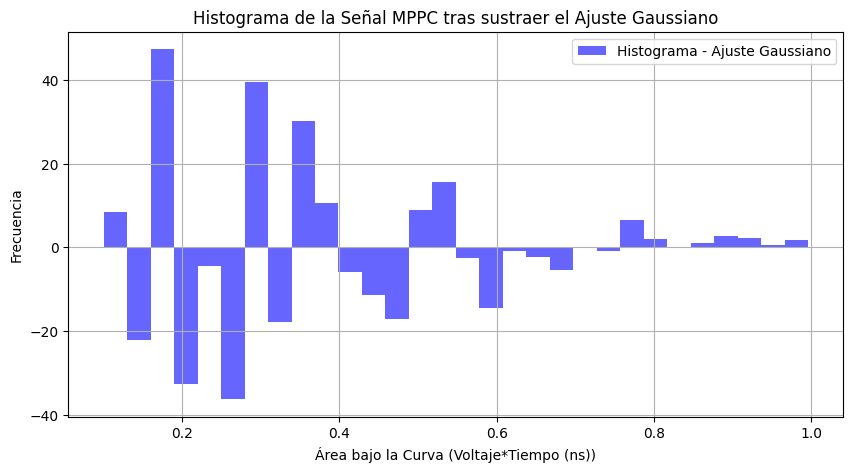

Parámetros del ajuste gaussiano: a = 472.1889143480801, x0 = 0.14853356102215276, sigma = 0.21642431172961846


In [14]:

from scipy.stats import norm
from scipy.optimize import curve_fit

# Asumimos que tienes una lista/array 'integrales_mppc_finitas' con tus datos

# Definir una función para el ajuste gaussiano
def gaussiana(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Filtrar los datos que están en el rango de interés
datos_filtrados = [dato for dato in integrales_mppc_finitas if 0.1 <= dato <= 1]

# Preparar los datos para el ajuste
hist_data, bin_edges = np.histogram(datos_filtrados, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Ajustar la gaussiana a los datos
popt, _ = curve_fit(gaussiana, bin_centers, hist_data, p0=[1, np.mean(datos_filtrados), np.std(datos_filtrados)])

# Crear una secuencia de puntos para la representación de la gaussiana ajustada
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y_fit = gaussiana(x_fit, *popt)

# Restar la gaussiana ajustada del histograma original
y_hist_fit = hist_data - gaussiana(bin_centers, *popt)

# Graficar el histograma original y la gaussiana ajustada
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, hist_data, width=bin_centers[1]-bin_centers[0], color='blue', alpha=0.6, label='Datos')
plt.plot(x_fit, y_fit, 'r--', label='Ajuste Gaussiano')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.title('Ajuste Gaussiano del Histograma MPPC')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la diferencia entre el histograma original y el ajuste
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, y_hist_fit, width=bin_centers[1]-bin_centers[0], color='blue', alpha=0.6, label='Histograma - Ajuste Gaussiano')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Señal MPPC tras sustraer el Ajuste Gaussiano')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los parámetros de la gaussiana ajustada
print(f"Parámetros del ajuste gaussiano: a = {popt[0]}, x0 = {popt[1]}, sigma = {popt[2]}")

## Análisis de Señal mediante Sustracción de Fondo Gaussiano

**Acción**: Este procedimiento extrae una señal de interés de un conjunto de datos completo sustrayendo un fondo modelado por una función gaussiana.

**Etapas**:
1. **Histograma de Datos**: Calcula el histograma del conjunto de datos completo.
2. **Modelado Gaussiano**: Usa parámetros de ajuste previos para calcular la gaussiana en el rango de interés.
3. **Normalización**: Ajusta la gaussiana para que coincida el área bajo la curva con el histograma en el rango de ajuste.
4. **Sustracción**: Resta la gaussiana normalizada del histograma completo para obtener la señal.
5. **Visualización**: Grafica tanto el histograma con la gaussiana sustraída como la señal resultante.


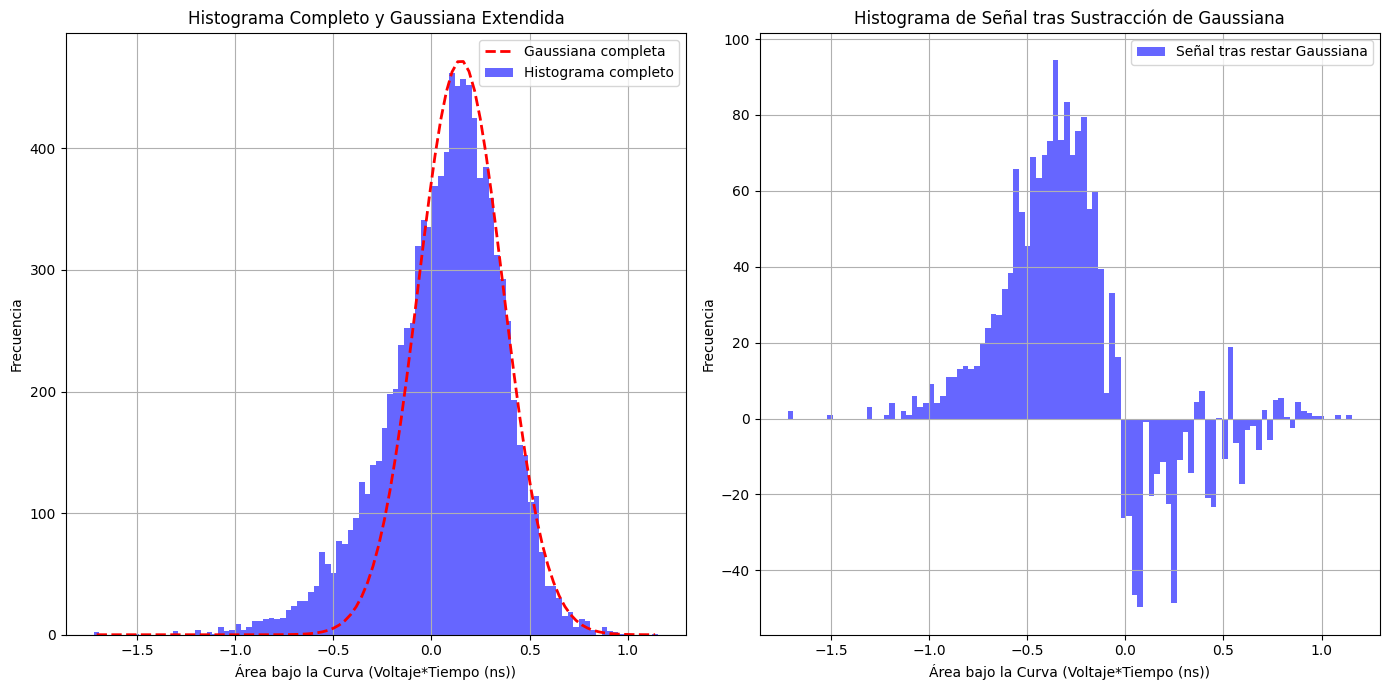

In [15]:
# Calculamos el histograma del conjunto completo de datos
hist_data_completo, bin_edges_completo = np.histogram(integrales_mppc_finitas, bins=100)
bin_centers_completo = (bin_edges_completo[:-1] + bin_edges_completo[1:]) / 2

# Calculamos la gaussiana con los parámetros obtenidos del ajuste en el rango de interés
y_gauss_ajuste = gaussiana(bin_centers, *popt)

# Calculamos el área bajo la curva del histograma en el rango de ajuste
area_histograma_ajuste = sum(hist_data * np.diff(bin_edges))

# Calculamos el área bajo la curva de la gaussiana ajustada
area_gaussiana_ajuste = sum(y_gauss_ajuste * np.diff(bin_edges))

# Calculamos el factor de normalización para que la gaussiana ajustada tenga la misma área que el histograma
factor_normalizacion = area_histograma_ajuste / area_gaussiana_ajuste

# Aplicamos el factor de normalización a la gaussiana completa
y_gauss_completa = gaussiana(bin_centers_completo, *popt) * factor_normalizacion

# Restamos la gaussiana completa del histograma original
senal = hist_data_completo - y_gauss_completa

# Graficamos el histograma completo, la gaussiana extendida y la señal resultante
plt.figure(figsize=(14, 7))

# Histograma original completo
plt.subplot(1, 2, 1)
plt.bar(bin_centers_completo, hist_data_completo, width=bin_centers_completo[1]-bin_centers_completo[0], color='blue', alpha=0.6, label='Histograma completo')
plt.plot(bin_centers_completo, y_gauss_completa, 'r--', linewidth=2, label='Gaussiana completa')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.title('Histograma Completo y Gaussiana Extendida')
plt.legend()
plt.grid(True)

# Señal después de restar la gaussiana
plt.subplot(1, 2, 2)
plt.bar(bin_centers_completo, senal, width=bin_centers_completo[1]-bin_centers_completo[0], color='blue', alpha=0.6, label='Señal tras restar Gaussiana')
plt.xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
plt.ylabel('Frecuencia')
plt.title('Histograma de Señal tras Sustracción de Gaussiana')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
"""

# Calcular el histograma de integrales de pulso (por ejemplo, para MPPC)
hist_integrales_mppc, bin_edges_mppc = np.histogram(integrales_mppc_finitas, bins=100)
bin_centers_mppc = (bin_edges_mppc[:-1] + bin_edges_mppc[1:]) / 2

# Restar la gaussiana ajustada del histograma
senal_mppc = hist_integrales_mppc - gaussiana_ajustada(bin_centers_mppc, *parametros_ajuste_gaussiana)

# Considerar valores negativos como cero
senal_mppc_positiva = np.maximum(senal_mppc, 0)

# Calcular el número total de pulsos
numero_total_pulsos_mppc = np.sum(senal_mppc_positiva)

print(f"Número total de pulsos en el histograma resultante (MPPC): {numero_total_pulsos_mppc}")"""


NameError: name 'gaussiana_ajustada' is not defined

## Estimación de Pulsos Post-Sustracción Gaussiana

**Acción**: Calcula el número total de pulsos tras ajustar la señal para eliminar valores negativos y sustraer el fondo gaussiano.

**Pasos**:
1. **Corrección de Valores Negativos**: Convierte valores negativos a cero para asegurar que todos los valores de señal sean positivos.
2. **Cálculo del Total de Pulsos**: Suma las alturas de los bins de la señal corregida para estimar el número total de pulsos.


In [17]:
# Asegurarse de que los valores negativos se consideren como cero
senal_positiva = np.maximum(senal, 0)

# Calcular el número total de pulsos como la suma de las alturas de los bins
numero_total_pulsos = np.sum(senal_positiva)

print(f"Número total de pulsos estimado después de la sustracción de la gaussiana: {numero_total_pulsos}")





Número total de pulsos estimado después de la sustracción de la gaussiana: 1475.155157762872


In [18]:
"""import numpy as np
import matplotlib.pyplot as plt


# Calcular las integrales de cada pulso y filtrar los NaN e inf para PMT
integrales_pmt = [np.trapz(pulso['PMT'].values, pulso['Time'].values) for pulso in pulsos_pmt_umbral]
integrales_pmt_finitas = [integral for integral in integrales_pmt if np.isfinite(integral)]

limite_inferior_511= -0.7e-7
limite_superior_511= -0.6e-7
limite_inferior_1274= -2.0e-7
limite_superior_1274= -1.8e-7

# Definir los rangos para los picos de 511 keV y 1274 keV basándote en tu histograma
rango_pico_511 = (limite_inferior_511, limite_superior_511) # Reemplaza con los límites reales del primer pico
rango_pico_1274 = (limite_inferior_1274, limite_superior_1274) # Reemplaza con los límites reales del segundo pico

# Calcular el área bajo la curva para los rangos definidos
area_pico_511 = sum(integral for integral in integrales_pmt_finitas if rango_pico_511[0] <= integral <= rango_pico_511[1])
area_pico_1274 = sum(integral for integral in integrales_pmt_finitas if rango_pico_1274[0] <= integral <= rango_pico_1274[1])

# Imprimir las áreas calculadas para verificación
print(f"Área bajo la curva para el pico de 511 keV: {area_pico_511}")
print(f"Área bajo la curva para el pico de 1274 keV: {area_pico_1274}")

# El resto del código para generar histogramas..."""


Área bajo la curva para el pico de 511 keV: 0
Área bajo la curva para el pico de 1274 keV: 0


## Análisis de Integrales de Pulsos por Rango

**Acción**: Discrimina y compara las integrales de pulsos PMT y MPPC basándose en rangos especificados de energía.

**Proceso**:
1. **Discriminación por Rango**: Identifica pulsos PMT dentro y fuera de rangos de energía definidos.
2. **Asociación con MPPC**: Recopila integrales de MPPC correspondientes a los pulsos PMT discriminados.
3. **Análisis Estadístico**: Calcula estadísticas (media y RMS) para los datos dentro y fuera del rango.
4. **Visualización**: Muestra histogramas para pulsos PMT y MPPC, separados por los criterios de rango.


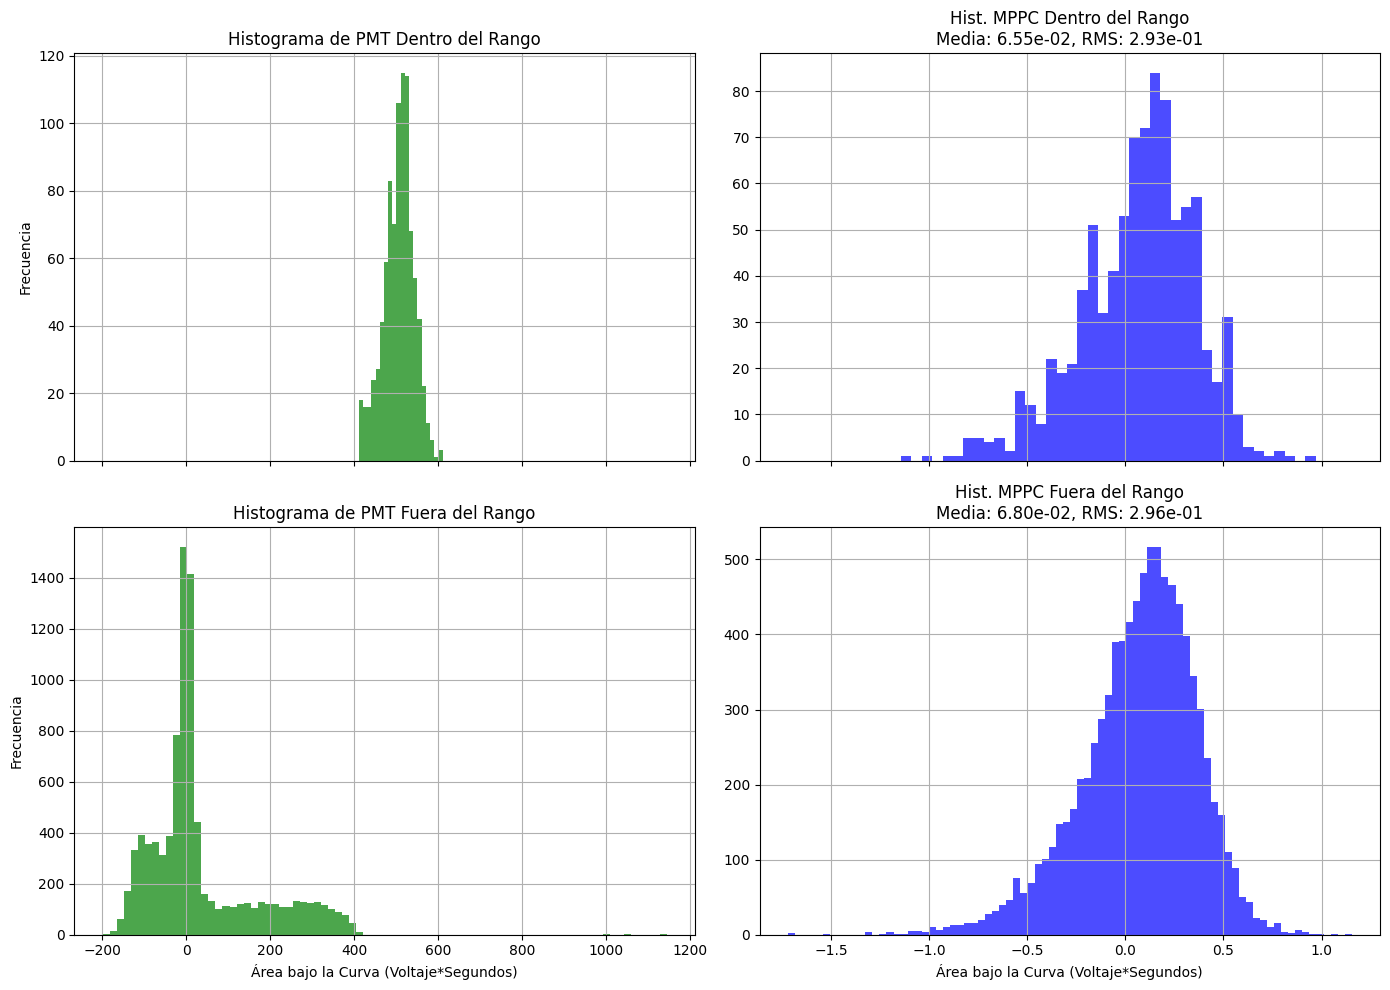

In [31]:
import numpy as np
import matplotlib.pyplot as plt



# Identificar índices de pulsos PMT dentro y fuera del rango especificado
rango = (411, 611)
rango2 = (411, 1000)
indices_dentro_rango = [i for i, integral in enumerate(integrales_pmt_finitas) if rango[0] < integral < rango[1]]
indices_fuera_rango = [i for i, integral in enumerate(integrales_pmt_finitas) if not (rango2[0] < integral < rango2[1])]

# Listas para almacenar las integrales de MPPC asociadas a las integrales de PMT dentro y fuera del rango
integrales_mppc_dentro = [integrales_mppc_finitas[i] for i in indices_dentro_rango]
integrales_mppc_fuera = [integrales_mppc_finitas[i] for i in indices_fuera_rango]

# Calcular la media y el RMS para los datos dentro y fuera del rango
mean_dentro = np.mean(integrales_mppc_dentro)
rms_dentro = np.std(integrales_mppc_dentro)
mean_fuera = np.mean(integrales_mppc_fuera)
rms_fuera = np.std(integrales_mppc_fuera)

# Configurar el lienzo para los histogramas
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex='col')

# Histograma de integrales de PMT dentro del rango
axs[0, 0].hist([energias_calibradas[i] for i in indices_dentro_rango], bins=20, color='green', alpha=0.7)
axs[0, 0].set_title('Histograma de PMT Dentro del Rango')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].grid(True)

# Histograma de integrales de PMT fuera del rango
axs[1, 0].hist([energias_calibradas[i] for i in indices_fuera_rango], bins=80, color='green', alpha=0.7)
axs[1, 0].set_title('Histograma de PMT Fuera del Rango')
axs[1, 0].set_xlabel('Área bajo la Curva (Voltaje*Segundos)')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].grid(True)

# Histograma de integrales de MPPC asociado a PMT dentro del rango
axs[0, 1].hist(integrales_mppc_dentro, bins=40, color='blue', alpha=0.7)
axs[0, 1].set_title(f'Hist. MPPC Dentro del Rango\nMedia: {mean_dentro:.2e}, RMS: {rms_dentro:.2e}')
axs[0, 1].grid(True)

# Histograma de integrales de MPPC asociado a PMT fuera del rango
axs[1, 1].hist(integrales_mppc_fuera, bins=80, color='blue', alpha=0.7)
axs[1, 1].set_title(f'Hist. MPPC Fuera del Rango\nMedia: {mean_fuera:.2e}, RMS: {rms_fuera:.2e}')
axs[1, 1].set_xlabel('Área bajo la Curva (Voltaje*Segundos)')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


Se ajustan mejor los bins y colores

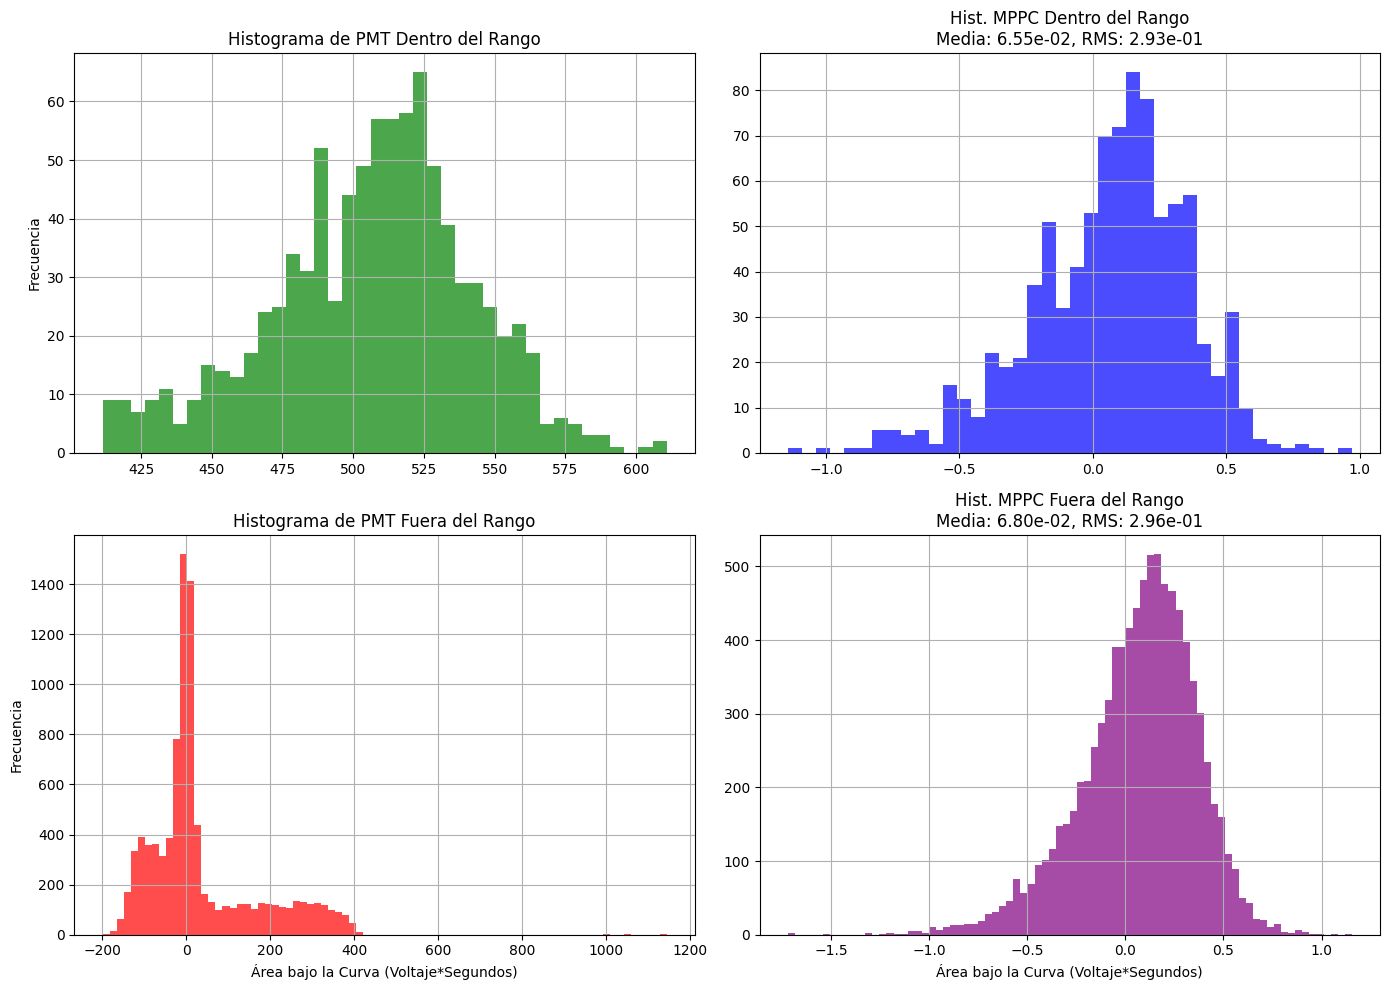

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que las listas 'integrales_mppc_finitas' y 'integrales_pmt_finitas' ya están definidas
# Supongamos también que la lista 'energias_calibradas' está definida y corresponde a las integrales PMT

# Definición de los rangos
rango = (411, 611)
rango2 = (411, 1000)

# Identificación de índices dentro y fuera de rango
indices_dentro_rango = [i for i, integral in enumerate(integrales_pmt_finitas) if rango[0] < integral < rango[1]]
indices_fuera_rango = [i for i, integral in enumerate(integrales_pmt_finitas) if not (rango2[0] < integral < rango2[1])]

# Integrales MPPC asociadas
integrales_mppc_dentro = [integrales_mppc_finitas[i] for i in indices_dentro_rango]
integrales_mppc_fuera = [integrales_mppc_finitas[i] for i in indices_fuera_rango]

# Cálculo de estadísticas
mean_dentro = np.mean(integrales_mppc_dentro)
rms_dentro = np.std(integrales_mppc_dentro)
mean_fuera = np.mean(integrales_mppc_fuera)
rms_fuera = np.std(integrales_mppc_fuera)

# Configuración de la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de integrales PMT dentro del rango
axs[0, 0].hist([energias_calibradas[i] for i in indices_dentro_rango], bins=40, color='green', alpha=0.7)
axs[0, 0].set_title('Histograma de PMT Dentro del Rango')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].grid(True)

# Histograma de integrales PMT fuera del rango
axs[1, 0].hist([energias_calibradas[i] for i in indices_fuera_rango], bins=80, color='red', alpha=0.7)
axs[1, 0].set_title('Histograma de PMT Fuera del Rango')
axs[1, 0].set_xlabel('Área bajo la Curva (Voltaje*Segundos)')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].grid(True)

# Histograma de integrales MPPC dentro del rango
axs[0, 1].hist(integrales_mppc_dentro, bins=40, color='blue', alpha=0.7)
axs[0, 1].set_title(f'Hist. MPPC Dentro del Rango\nMedia: {mean_dentro:.2e}, RMS: {rms_dentro:.2e}')
axs[0, 1].grid(True)

# Histograma de integrales MPPC fuera del rango
axs[1, 1].hist(integrales_mppc_fuera, bins=80, color='purple', alpha=0.7)
axs[1, 1].set_title(f'Hist. MPPC Fuera del Rango\nMedia: {mean_fuera:.2e}, RMS: {rms_fuera:.2e}')
axs[1, 1].set_xlabel('Área bajo la Curva (Voltaje*Segundos)')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Se plotean por region

Region de interes

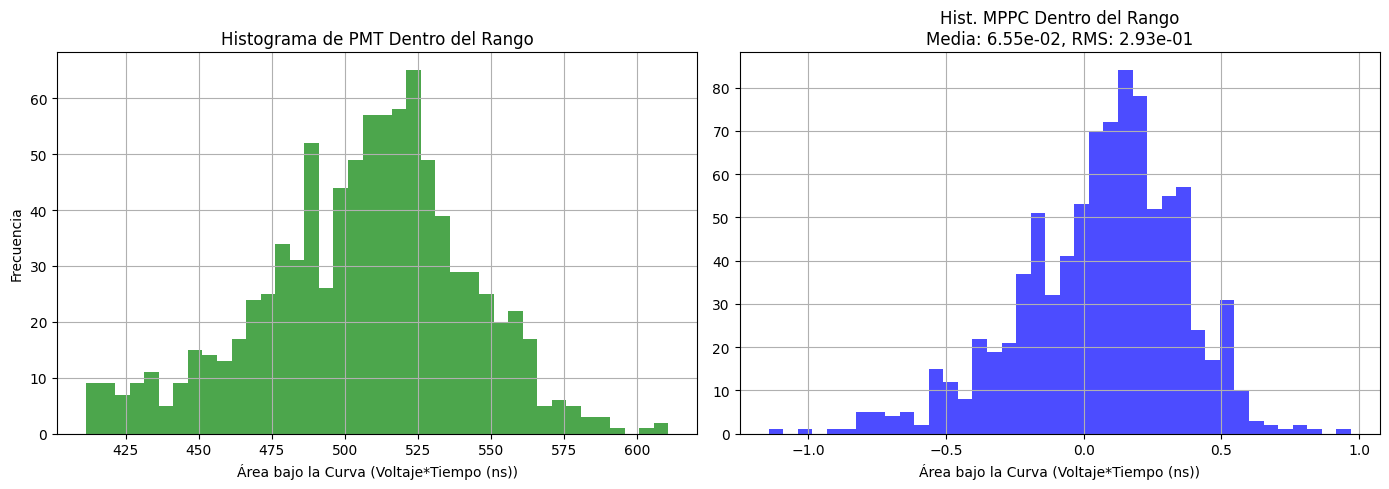

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que las listas y los rangos ya están definidos como en el código anterior

# Calculo de estadísticas para datos dentro del rango
mean_dentro = np.mean(integrales_mppc_dentro)
rms_dentro = np.std(integrales_mppc_dentro)

# Gráfico para datos dentro del rango
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de integrales PMT dentro del rango
axs[0].hist([energias_calibradas[i] for i in indices_dentro_rango], bins=40, color='green', alpha=0.7)
axs[0].set_title('Histograma de PMT Dentro del Rango')
axs[0].set_xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

# Histograma de integrales MPPC dentro del rango
axs[1].hist(integrales_mppc_dentro, bins=40, color='blue', alpha=0.7)
axs[1].set_title(f'Hist. MPPC Dentro del Rango\nMedia: {mean_dentro:.2e}, RMS: {rms_dentro:.2e}')
axs[1].set_xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
len(integrales_mppc_dentro)

Region fuera

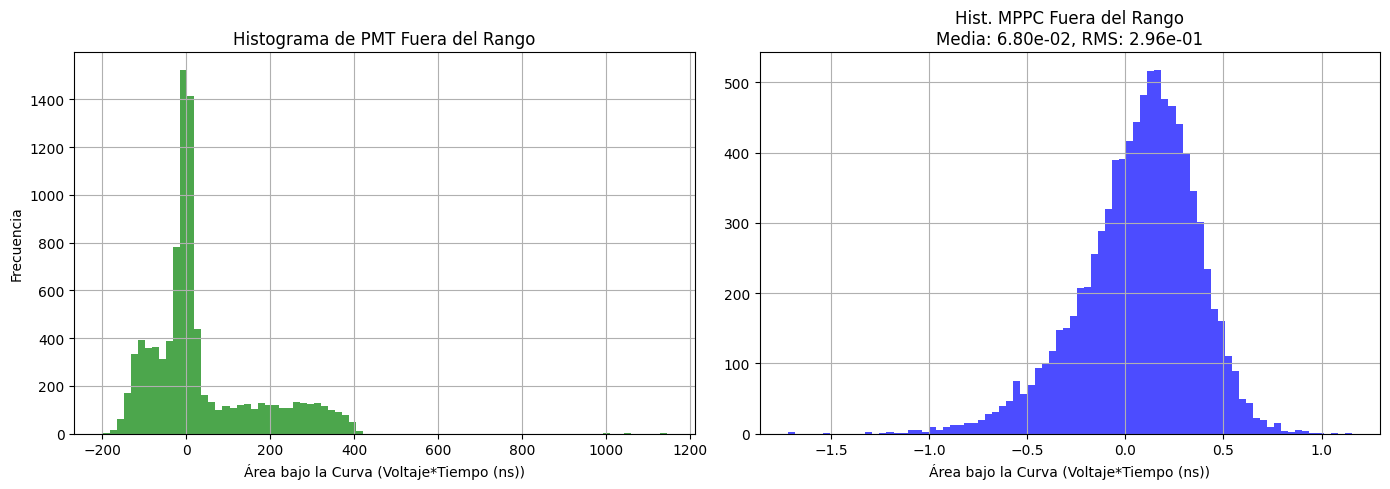

In [34]:
# Calculo de estadísticas para datos fuera del rango
mean_fuera = np.mean(integrales_mppc_fuera)
rms_fuera = np.std(integrales_mppc_fuera)

# Gráfico para datos fuera del rango
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de integrales PMT fuera del rango
axs[0].hist([energias_calibradas[i] for i in indices_fuera_rango], bins=80, color='green', alpha=0.7)
axs[0].set_title('Histograma de PMT Fuera del Rango')
axs[0].set_xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

# Histograma de integrales MPPC fuera del rango
axs[1].hist(integrales_mppc_fuera, bins=80, color='blue', alpha=0.7)
axs[1].set_title(f'Hist. MPPC Fuera del Rango\nMedia: {mean_fuera:.2e}, RMS: {rms_fuera:.2e}')
axs[1].set_xlabel('Área bajo la Curva (Voltaje*Tiempo (ns))')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Visualización de Pulsos por Rango de Energía

**Acción**: Muestra gráficamente la distinción de pulsos MPPC y PMT basada en un rango de energía predefinido y cuenta los pulsos dentro y fuera de este rango.

**Proceso**:
1. **Gráficos de Pulsos**: Presenta secuencias de pulsos MPPC y PMT clasificados según si caen dentro o fuera del rango de energía establecido.
2. **Conteo de Pulsos**: Calcula y muestra la cantidad de pulsos que se encuentran dentro y fuera del rango especificado.


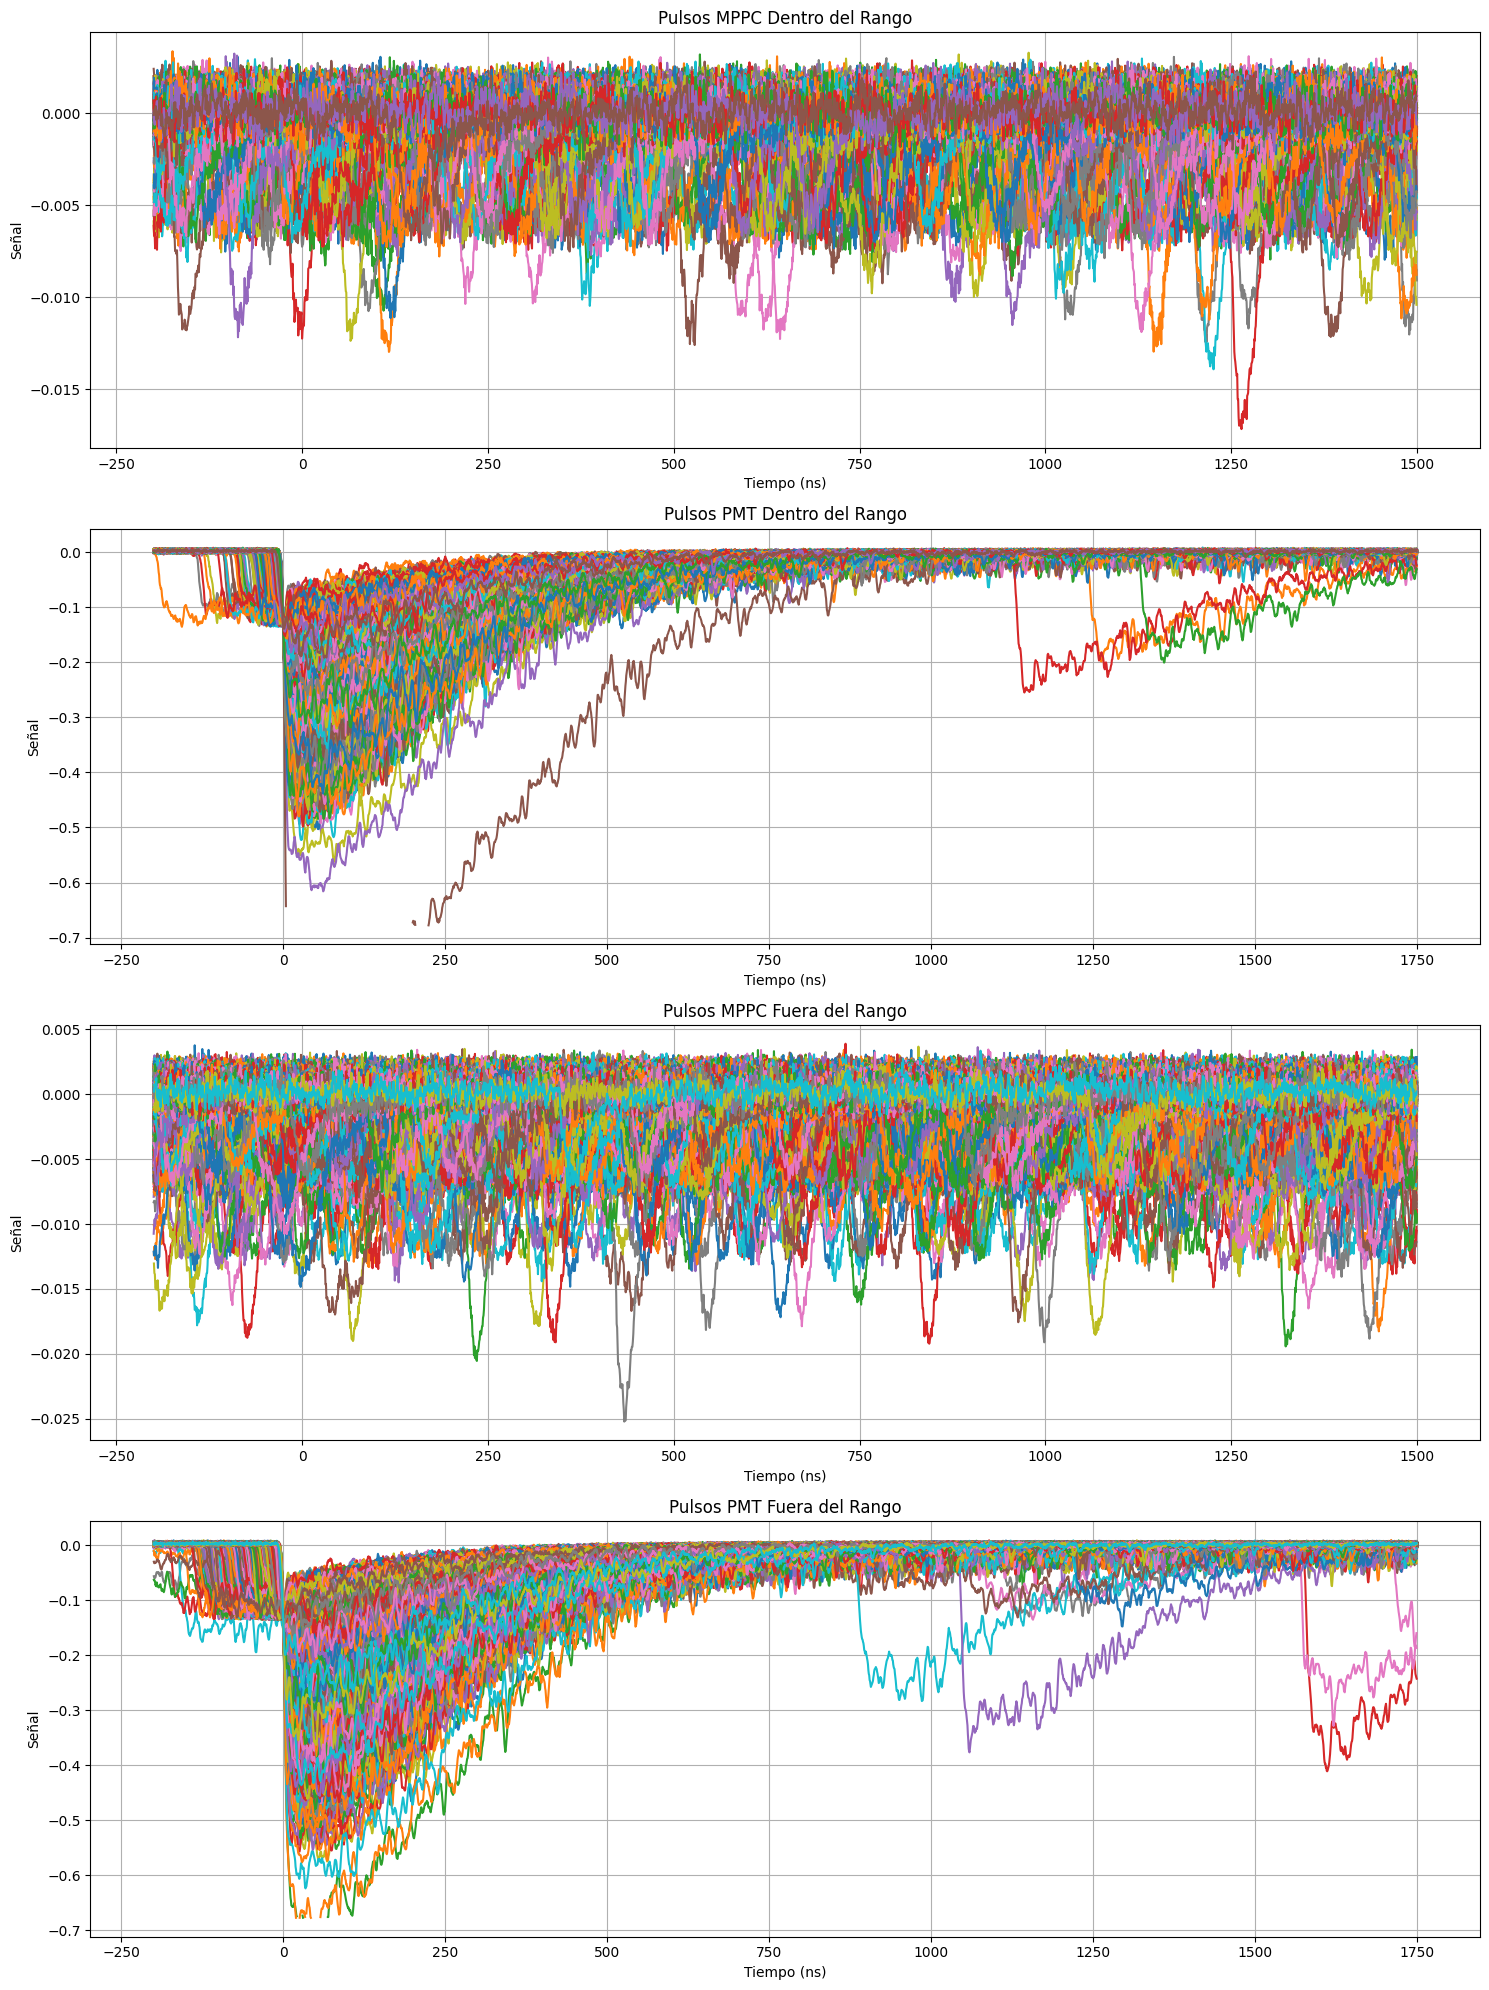

Número de pulsos dentro del rango: 896
Número de pulsos fuera del rango: 9060


In [35]:
# Configurar el lienzo para los gráficos
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Graficar pulsos MPPC dentro del rango
for i in indices_dentro_rango:
    axs[0].plot(pulsos_mppc_umbral[i]['Time'], pulsos_mppc_umbral[i]['MPPC'], label=f'Pulso {i}')
axs[0].set_title('Pulsos MPPC Dentro del Rango')
axs[0].set_xlabel('Tiempo (ns)')
axs[0].set_ylabel('Señal')
axs[0].grid(True)

# Graficar pulsos PMT dentro del rango
for i in indices_dentro_rango:
    axs[1].plot(pulsos_pmt_umbral[i]['Time'], pulsos_pmt_umbral[i]['PMT'], label=f'Pulso {i}')
axs[1].set_title('Pulsos PMT Dentro del Rango')
axs[1].set_xlabel('Tiempo (ns)')
axs[1].set_ylabel('Señal')
axs[1].grid(True)

# Graficar pulsos MPPC fuera del rango
for i in indices_fuera_rango:
    axs[2].plot(pulsos_mppc_umbral[i]['Time'], pulsos_mppc_umbral[i]['MPPC'], label=f'Pulso {i}')
axs[2].set_title('Pulsos MPPC Fuera del Rango')
axs[2].set_xlabel('Tiempo (ns)')
axs[2].set_ylabel('Señal')
axs[2].grid(True)

# Graficar pulsos PMT fuera del rango
for i in indices_fuera_rango:
    axs[3].plot(pulsos_pmt_umbral[i]['Time'], pulsos_pmt_umbral[i]['PMT'], label=f'Pulso {i}')
axs[3].set_title('Pulsos PMT Fuera del Rango')
axs[3].set_xlabel('Tiempo (ns)')
axs[3].set_ylabel('Señal')
axs[3].grid(True)

plt.tight_layout()
plt.show()

# Contar cuántos pulsos hay dentro y fuera del rango
num_pulsos_dentro = len(indices_dentro_rango)
num_pulsos_fuera = len(indices_fuera_rango)

print(f'Número de pulsos dentro del rango: {num_pulsos_dentro}')
print(f'Número de pulsos fuera del rango: {num_pulsos_fuera}')


## Evaluación de Fracción de Pulsos por Rango

**Acción**: Determina y muestra la proporción de pulsos MPPC y PMT dentro y fuera de un rango de energía específico.

**Proceso**:
1. **Conteo Total de Pulsos**: Identifica el número total de pulsos que superan un umbral.
2. **Cálculo de Fracciones**: Establece la proporción de esos pulsos que se encuentran dentro y fuera del rango definido.


In [36]:
# Contar el total de pulsos del umbral
total_pulsos_mppc_umbral = len(pulsos_mppc_umbral)
total_pulsos_pmt_umbral = len(pulsos_pmt_umbral)

# Calcular la fracción de pulsos dentro del rango
fraccion_dentro_mppc = len(indices_dentro_rango) / total_pulsos_mppc_umbral
fraccion_dentro_pmt = len(indices_dentro_rango) / total_pulsos_pmt_umbral

# Calcular la fracción de pulsos fuera del rango
fraccion_fuera_mppc = len(indices_fuera_rango) / total_pulsos_mppc_umbral
fraccion_fuera_pmt = len(indices_fuera_rango) / total_pulsos_pmt_umbral

print(f'Fracción de pulsos MPPC dentro del rango: {fraccion_dentro_mppc:.2%}')
print(f'Fracción de pulsos PMT dentro del rango: {fraccion_dentro_pmt:.2%}')
print(f'Fracción de pulsos MPPC fuera del rango: {fraccion_fuera_mppc:.2%}')
print(f'Fracción de pulsos PMT fuera del rango: {fraccion_fuera_pmt:.2%}')


Fracción de pulsos MPPC dentro del rango: 8.96%
Fracción de pulsos PMT dentro del rango: 8.96%
Fracción de pulsos MPPC fuera del rango: 90.61%
Fracción de pulsos PMT fuera del rango: 90.61%


In [31]:
total_pulsos_mppc_umbral

9999

## Comparación de Histogramas MPPC por Rango

**Acción**: Calcula la diferencia entre los histogramas de integrales de pulso MPPC dentro y fuera de un rango especificado y visualiza el resultado.

**Proceso**:
1. **Definición de Bins**: Establece el número de bins y calcula los límites basándose en los datos.
2. **Cálculo de Histogramas**: Genera histogramas para integrales dentro y fuera del rango.
3. **Resta y Visualización**: Muestra la diferencia entre los dos histogramas para resaltar las variaciones.


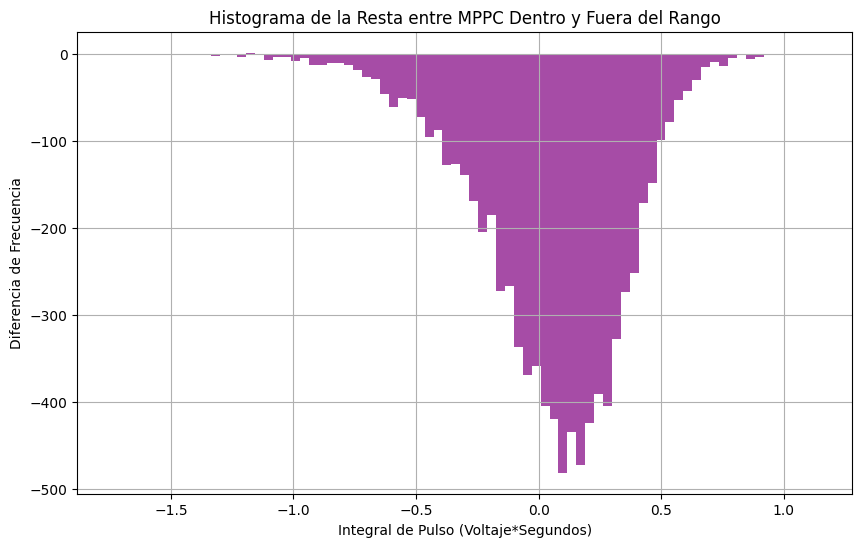

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el número de bins y los rangos para los histogramas
num_bins = 80
data_min = min(min(integrales_mppc_dentro), min(integrales_mppc_fuera))
data_max = max(max(integrales_mppc_dentro), max(integrales_mppc_fuera))
bins = np.linspace(data_min, data_max, num_bins)

# Calcular los histogramas con numpy
hist_mppc_dentro, _ = np.histogram(integrales_mppc_dentro, bins=bins)
hist_mppc_fuera, _ = np.histogram(integrales_mppc_fuera, bins=bins)

# Restar los histogramas
hist_resta = hist_mppc_dentro - hist_mppc_fuera

# Graficar el histograma de la resta
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist_resta, width=np.diff(bins), color='purple', alpha=0.7)
plt.title('Histograma de la Resta entre MPPC Dentro y Fuera del Rango')
plt.xlabel('Integral de Pulso (Voltaje*Segundos)')
plt.ylabel('Diferencia de Frecuencia')
plt.grid(True)
plt.show()


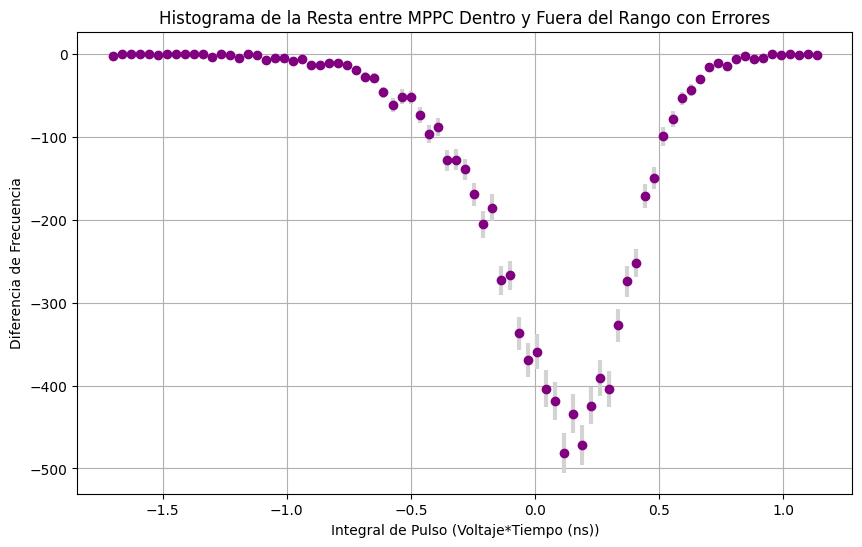

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el número de bins y los rangos para los histogramas
num_bins = 80
data_min = min(min(integrales_mppc_dentro), min(integrales_mppc_fuera))
data_max = max(max(integrales_mppc_dentro), max(integrales_mppc_fuera))
bins = np.linspace(data_min, data_max, num_bins)

# Calcular los histogramas con numpy
hist_mppc_dentro, _ = np.histogram(integrales_mppc_dentro, bins=bins)
hist_mppc_fuera, _ = np.histogram(integrales_mppc_fuera, bins=bins)

# Calcular los errores (raíz cuadrada del contenido del histograma)
error_mppc_dentro = np.sqrt(hist_mppc_dentro)
error_mppc_fuera = np.sqrt(hist_mppc_fuera)

# Restar los histogramas
hist_resta = hist_mppc_dentro - hist_mppc_fuera

# Calcular el error en la resta
error_resta = np.sqrt(error_mppc_dentro**2 + error_mppc_fuera**2)

# Coordenadas x para cada bin (centro del bin)
x = (bins[:-1] + bins[1:]) / 2

# Graficar el histograma de la resta con barras de error
plt.figure(figsize=(10, 6))
plt.errorbar(x, hist_resta, yerr=error_resta, fmt='o', color='purple', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Histograma de la Resta entre MPPC Dentro y Fuera del Rango')
plt.xlabel('Integral de Pulso (Voltaje*Tiempo (ns))')
plt.ylabel('Diferencia de Frecuencia')
plt.grid(True)
plt.show()

In [39]:
cantidad_pulsos = np.sum(hist_resta)

print("Cantidad de pulsos resultantes:", 10000+cantidad_pulsos)

Cantidad de pulsos resultantes: 1836


## Visualización de Correlación entre Integrales MPPC y PMT

**Acción**: Muestra la correlación entre las integrales de pulsos MPPC y PMT dentro de un rango especificado mediante un histograma 2D y histogramas 1D marginales.

**Proceso**:
1. **Selección de Datos**: Filtra integrales de MPPC y PMT dentro y fuera de un rango predefinido.
2. **Ajuste de Longitudes**: Iguala las longitudes de los arrays de MPPC y PMT para la correlación.
3. **Configuración Gráfica**: Utiliza `matplotlib.gridspec` para crear un layout con histograma 2D y marginales 1D.
4. **Visualización**: Presenta histogramas 2D de correlación y 1D marginales para MPPC y PMT.


In [40]:

indices_dentro_rango = [i for i, integral in enumerate(integrales_pmt_finitas) if rango[0] < integral < rango[1]]
indices_fuera_rango = [i for i, integral in enumerate(integrales_pmt_finitas) if not (rango2[0] < integral < rango2[1])]

# Listas para almacenar las integrales de MPPC asociadas a las integrales de PMT dentro y fuera del rango
integrales_mppc_dentro_cut = [integrales_mppc_finitas[i] for i in indices_dentro_rango]
integrales_pmt_dentro_cut = [integrales_pmt_finitas[i] for i in indices_dentro_rango]

integrales_mppc_fuera_cut = [integrales_mppc_finitas[i] for i in indices_fuera_rango]
integrales_pmt_fuera_cut = [integrales_pmt_finitas[i] for i in indices_fuera_rango]

# Dentro del rango de interes

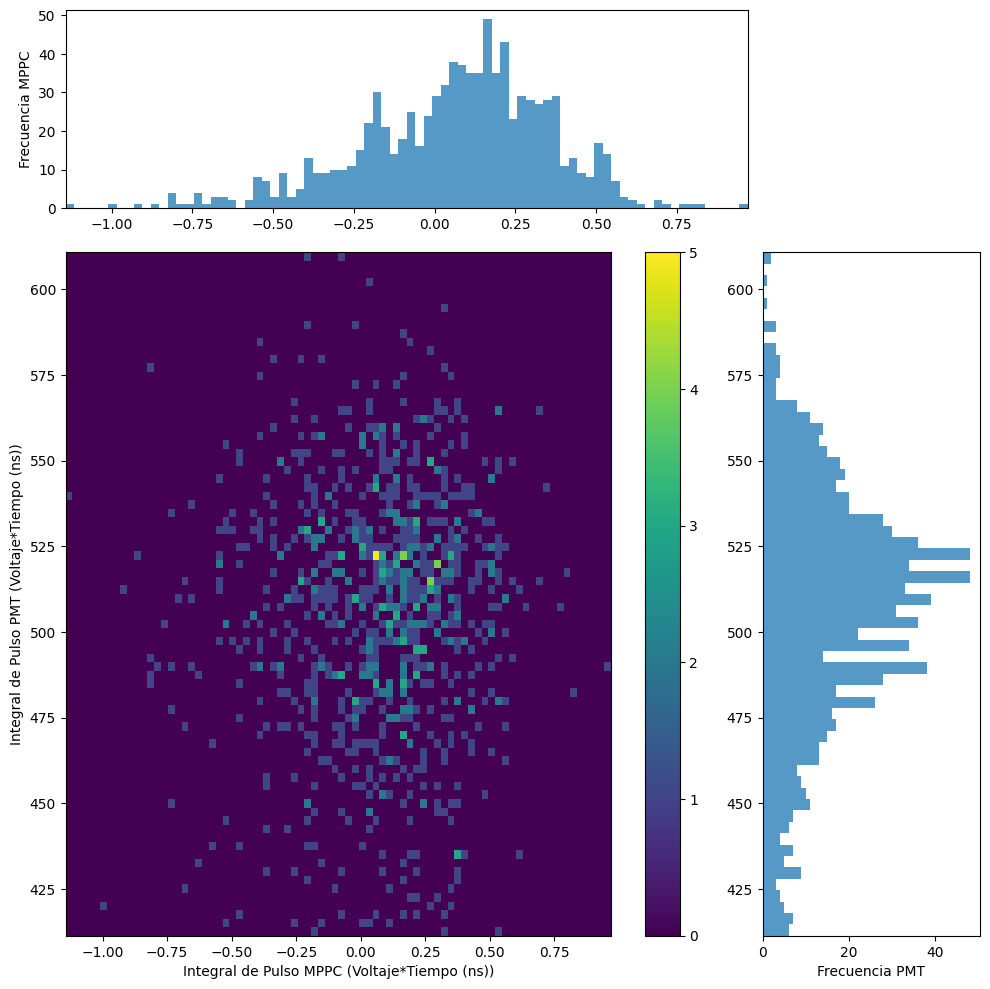

In [41]:
integrales_mppc_np_dentro = np.array(integrales_mppc_dentro_cut)
integrales_pmt_np_dentro = np.array(integrales_pmt_dentro_cut)
# Igualar las longitudes de las listas

min_length = min(len(integrales_mppc_np_dentro), len(integrales_pmt_np_dentro))
integrales_mppc_np_dentro = integrales_mppc_np_dentro[:min_length]
integrales_pmt_np_dentro = integrales_pmt_np_dentro[:min_length]


# Configuración del espacio de la figura
plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(4, 4)

# Histograma 2D en el centro
ax_hist2d = plt.subplot(gs[1:4, 0:3])
hist2d = ax_hist2d.hist2d(integrales_mppc_np_dentro, integrales_pmt_np_dentro, bins=80, cmap='viridis')
ax_hist2d.set_xlabel('Integral de Pulso MPPC (Voltaje*Tiempo (ns))')
ax_hist2d.set_ylabel('Integral de Pulso PMT (Voltaje*Tiempo (ns))')

# Agregar la barra de colores
plt.colorbar(hist2d[3], ax=ax_hist2d)

# Histograma 1D para Integrales de MPPC en la parte superior
ax_histx = plt.subplot(gs[0, 0:3], sharex=ax_hist2d)
ax_histx.hist(integrales_mppc_np_dentro, bins=80, alpha=0.75)
ax_histx.set_ylabel('Frecuencia MPPC')

# Histograma 1D para Integrales de PMT en el lado derecho
ax_histy = plt.subplot(gs[1:4, 3], sharey=ax_hist2d)
ax_histy.hist(integrales_pmt_np_dentro, bins=60, orientation='horizontal', alpha=0.75)
ax_histy.set_xlabel('Frecuencia PMT')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

comparar los datos con los totales, para saber que fraccion de los datos es
y tambien comparar el pulso dividido en 2 rangos que completan el pulso y luego en solo dos sectores

In [42]:


# Suponiendo que hist2d es el resultado de la llamada a ax_hist2d.hist2d
# hist2d[0] contiene las cuentas en cada bin del histograma 2D
numero_total_eventos = np.sum(hist2d[0])

print(numero_total_eventos)


896.0


In [43]:
len(integrales_pmt_np_dentro)

896

# Fuera del rango de interes

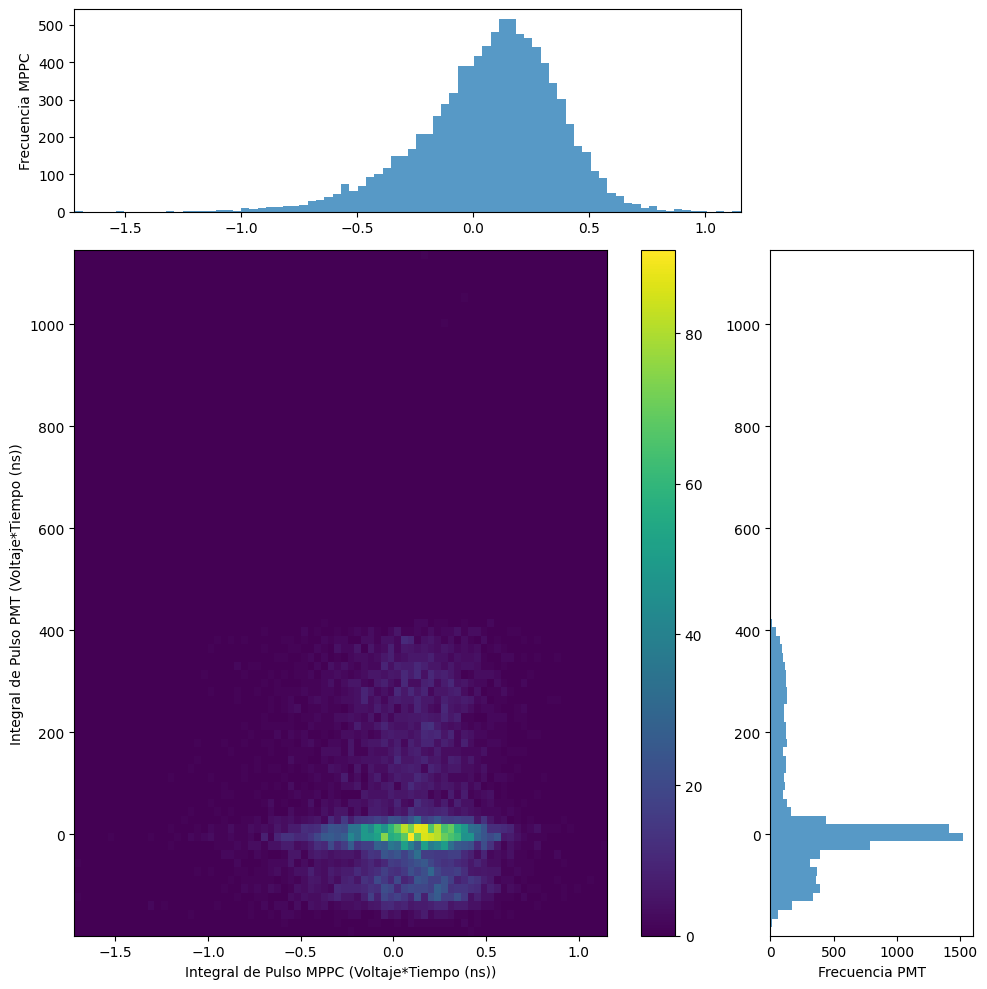

: 

In [44]:
integrales_mppc_np_fuera = np.array(integrales_mppc_fuera_cut)
integrales_pmt_np_fuera = np.array(integrales_pmt_fuera_cut)
# Igualar las longitudes de las listas

min_length = min(len(integrales_mppc_np_fuera), len(integrales_pmt_np_fuera))
integrales_mppc_np_fuera = integrales_mppc_np_fuera[:min_length]
integrales_pmt_np_fuera = integrales_pmt_np_fuera[:min_length]


# Configuración del espacio de la figura
plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(4, 4)

# Histograma 2D en el centro
ax_hist2d = plt.subplot(gs[1:4, 0:3])
hist2d = ax_hist2d.hist2d(integrales_mppc_np_fuera, integrales_pmt_np_fuera, bins=80, cmap='viridis')
ax_hist2d.set_xlabel('Integral de Pulso MPPC (Voltaje*Tiempo (ns))')
ax_hist2d.set_ylabel('Integral de Pulso PMT (Voltaje*Tiempo (ns))')

# Agregar la barra de colores
plt.colorbar(hist2d[3], ax=ax_hist2d)

# Histograma 1D para Integrales de MPPC en la parte superior
ax_histx = plt.subplot(gs[0, 0:3], sharex=ax_hist2d)
ax_histx.hist(integrales_mppc_np_fuera, bins=80, alpha=0.75)
ax_histx.set_ylabel('Frecuencia MPPC')

# Histograma 1D para Integrales de PMT en el lado derecho
ax_histy = plt.subplot(gs[1:4, 3], sharey=ax_hist2d)
ax_histy.hist(integrales_pmt_np_fuera, bins=80, orientation='horizontal', alpha=0.75)
ax_histy.set_xlabel('Frecuencia PMT')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Se guardan en root


In [31]:
# Definir el número de bins para los histogramas
num_bins = 80  # Este valor se puede ajustar según sea necesario

# Calcular los histogramas con numpy
hist_mppc2, bins_mppc = np.histogram(integrales_mppc_dentro_cut, bins=num_bins)
hist_pmt2, bins_pmt = np.histogram(integrales_pmt_dentro_cut, bins=num_bins)
# Calcular los histogramas con numpy
hist_mppc3, bins_mppc = np.histogram(integrales_mppc_fuera_cut, bins=num_bins)
hist_pmt3, bins_pmt = np.histogram(integrales_pmt_fuera_cut, bins=num_bins)


# Crear un nuevo archivo ROOT para guardar los histogramas
with uproot.recreate("HistocutA.root") as f:
    # Guardar el histograma de MPPC
    f["histA_mppc"] = (hist_mppc2, bins_mppc)
    
    # Guardar el histograma de PMT
    f["histA_pmt"] = (hist_pmt2, bins_pmt)
    # Guardar el histograma de MPPC
    f["histB_mppc"] = (hist_mppc3, bins_mppc)
    
    # Guardar el histograma de PMT
    f["histB_pmt"] = (hist_pmt3, bins_pmt)

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Calcular el histograma 2D
hist, xedges, yedges = np.histogram2d(integrales_mppc_np_dentro, integrales_pmt_np_dentro, bins=80)

# Coordenadas para el histograma 3D
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
zpos = hist

# Crear la figura 3D
fig = go.Figure(data=[go.Surface(z=zpos, x=xedges[:-1], y=yedges[:-1])])

# Configuración de los ejes, el título y el tamaño de la figura
fig.update_layout(scene=dict(
                    xaxis_title='Voltaje MPPC (V)',
                    yaxis_title='Voltaje PMT (V)',
                    zaxis_title='Frecuencia'),
                  title='Histograma 3D de Voltajes MPPC vs PMT',
                  autosize=False,
                  width=1200,  # Ajusta el ancho
                  height=1000,  # Ajusta la altura
                  margin=dict(l=65, r=50, b=65, t=90))

# Mostrar la figura
fig.show()
